# AllBank Loan Campaign: Outline

<a id='Table_of_Contents'></a>

## Table of Contents:

* (1) [Load and Review Data](#Load_and_Review_Data)
    * (a) [Univariate Analysis](#Univariate_Analysis)
    * (b) [Bivariate Analysis](#Bivariate_Analysis)
    * (c) [Initial Insights](#Initial_Insights)
* (2) [Data Pre-Processing](#Data_Pre-Processing)
* (3) [Logistic Regression Model](#Logistic_Regression_Model)
    * (a) [Model Using Sklearn](#Model_Using_Sklearn)
    * (b) [Model Using Statsmodel](#Model_Using_Statsmodel)
* (4) [Decision Tree Model](#Decision_Tree_Model)
    * (a) [Build Unpruned Tree](#Build_Unpruned_Tree)
    * (b) [Hyperparameter Tuning Using Grid Search](#Hyperparameter_Tuning_Using_Grid_Search)
    * (c) [Cost Complexity Pruning](#Cost_Complexity_Pruning)
* (5) [Insights and Marketing Impact](#Insights_and_Marketing_Impact)
* (6) [Misclassification Analysis](#Misclassification_Analysis)
* (7) [Business Recommendations](#Business_Recommendations)

## Objective:
* Determine if a liability customer will purchase a loan from AllBank
* Determine most significant variables in determing if a customer purchases a loan 
* Determine what segment of customer AllBank should target for loan consideration

## Dataset:
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Avg. spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by Universal Bank?

## Domain Information:
The majority of AllBanks customers are depositors, customers who have a checkings, savings and/or certificates of deposit with the bank. From the perspective of AllBank these customers deposits are liabilities as they funds must be repaid to the customer at some point. 

To increase profits, AllBank would like to posses more asset customers, borrowers who take out a loan from the bank. There is more money to be made in the long run from asset customers and loans.

The below analysis uses data contains information on which existing customers took out a loan with AllBank after a recent marketing campaign.

The conversion rate from that campaign was 9%. Is there a strategy to increase the conversion rate of future campaigns?

## Import Libraries

In [109]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import datasets
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
%matplotlib inline

import os
working_directory = os.getcwd()
print(working_directory)

/Users/jordan/DBSA Jupyter Notebooks/Projects/AllLife Bank


<a id='Load_and_Review_Data'></a>

# (1) Load and Review Data

In [2]:
path = working_directory +'/Loan_Modelling.csv'
loanData = pd.read_csv(path)

**Copy dataframe and look at first and last rows**

In [3]:
df = loanData.copy()
df.head(8)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1


In [4]:
df.tail(8)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


**Look at random rows**

In [5]:
np.random.seed(1)
df.sample(n=10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


***
* *Consider converting Mortgage column to categorical to determine if having a Mortgage effects conversion rate of liability customers.*
* *Columns pertaining to money are all in the same units.*
***

**Check the shape of the dataset**

In [6]:
df.shape

(5000, 14)

***
* *There are 5000 rows each representing a customer and 14 columns.*
***

**List column names**

In [7]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

***
* *ID column does not appear to add any relvant information. And as we are more concerend with categories of customers than individual customers, it is best to drop this column.*
* *Consider droping zipcode column as well if there is no meaningful way to group the observations.*
***

**Drop columns**

***
* There are 5000 rows each representing a customer and 14 columns
***

In [8]:
df.drop(['ID'],axis=1,inplace=True)

**Look at trimmed data frame**

In [9]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**Check data types of columns**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


***
* *Most categorical variables are already converted to integer values and one-hot-encoded.*
* *Consider converting experience, family, zipcode, and education to categorical as appropriate.*
***

**Check for missing values**

In [11]:
df.isnull().sum().sort_values(ascending=False)

CreditCard            0
Online                0
CD_Account            0
Securities_Account    0
Personal_Loan         0
Mortgage              0
Education             0
CCAvg                 0
Family                0
ZIPCode               0
Income                0
Experience            0
Age                   0
dtype: int64

***
* *There appears to be no missing information.*
***

**Check for duplicates**

In [12]:
df.duplicated(subset=None, keep='first').value_counts()

False    5000
dtype: int64

***
* *There appears to be no duplicate information.*
***

**Summary of data**

In [13]:
df.describe()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


***
* *Is it possible for customers to have negative years of word experience?.*
* *Perhaps negative numbers refer to customers still in school, or it could be an error.*
***

**Analyze Categorical Data**

In [14]:
df['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

***
* *The largest group in the family category only has one member.*
* *The smallest group has three members.*
***

In [15]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

***
* *The Family and Education columns behave more like categorical variables and will be treated as such in the below analysis.*
***

In [16]:
n = df.Experience.nunique()
print('No. of unique values in the Experience column:', n,'\n')
print('List of unique values in the Experience column:')
print(sorted(df.Experience.unique())) #print sorted list of numerical values in column

No. of unique values in the Experience column: 47 

List of unique values in the Experience column:
[-3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]


In [17]:
neg = df[df['Experience']< 0] #Sort customers with negative work experience into new dataframe
print('There are',neg.shape[0],'customers with negative work experience')

There are 52 customers with negative work experience


In [18]:
#Look for any patterns to see if this is a data input mistake 
#and if so how it should be handled
np.random.seed(1)
neg.sample(n=20) 

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3130,23,-2,82,92152,2,1.80,2,0,0,1,0,0,1
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
3946,25,-1,40,93117,3,2.40,2,0,0,0,0,1,0
3157,23,-1,13,94720,4,1.00,1,84,0,0,0,1,0
3076,29,-1,62,92672,2,1.75,3,0,0,0,0,0,1
4116,24,-2,135,90065,2,7.20,1,0,0,0,0,1,0
3279,26,-1,44,94901,1,2.00,2,0,0,0,0,0,0
3626,24,-3,28,90089,4,1.00,3,0,0,0,0,0,0
4088,29,-1,71,94801,2,1.75,3,0,0,0,0,0,0
1905,25,-1,112,92507,2,2.00,1,241,0,0,0,1,0


In [19]:
neg['Age'].describe()

count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: Age, dtype: float64

***
* *All customers with negative experience are between 23 and 29 years of age.*
* *There education background appears diverse.*
* *This may not be occuring because these customers are still in school.*
* *We should either drop these customers or replace their experience with a relevant data point. (Median or Zero).*
***

In [20]:
df.ZIPCode.nunique()

467

***
* *There are 467 unique zipcodes.*
* *This may be able to be grouped into smaller sections as each number position in a zipcode represents a different region.*
***

In [38]:
#Convert zipcode values to a list of strings for processing
zips = list((df['ZIPCode'])) 

zips = list(map(str, zips))

print('length:',len(zips))

length: 5000


In [22]:
#Make list of first numbers
First_no = []
for item in zips:
    item = item[0]
    First_no.append(item)

print('First nos. check:', First_no[:11])

#Make list of second numbers
Second_no = []
for item in zips:
    item = item[1]
    Second_no.append(item)

print('Second nos. check:',Second_no[:11])

#Make list of second and third numbers    
First_two = []
for item in zips:
    item = item[1:3]
    First_two.append(item)

print('First two nos. check:',First_two[:11])


First nos. check: ['9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9']
Second nos. check: ['1', '0', '4', '4', '1', '2', '1', '3', '0', '3', '4']
First two nos. check: ['11', '00', '47', '41', '13', '21', '17', '39', '00', '30', '47']


In [23]:
#Count the unique values of the first three digits among the zipcodes
Z1 = set(First_no)
print('No. of unique values in First_no:', len(Z1))
Z2 = set(Second_no)
print('No. of unique values in Second_no:', len(Z2))
Z3 = set(First_two)
print('No. of unique values in First_two:', len(Z3))

No. of unique values in First_no: 1
No. of unique values in Second_no: 7
No. of unique values in First_two: 57


***
* *Based off the above unique values it looks like zipcodes can be sorted into 7 groups*
***

In [24]:
df["ZIPCode"]=df["ZIPCode"].astype("string") #convert column to category type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   string 
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11), string(1)
memory usage: 507.9 KB


In [25]:
print(df.shape)
print(df.head())
print(type(df['ZIPCode'][10]))

(5000, 13)
   Age  Experience  Income ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49   91107       4    1.6          1         0   
1   45          19      34   90089       3    1.5          1         0   
2   39          15      11   94720       1    1.0          1         0   
3   35           9     100   94112       1    2.7          2         0   
4   35           8      45   91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
<class 'str'>


In [26]:
#Loop through each item in zipcode column and replace the value 
#with the second digit of the zipcode

index = -1
for item in df['ZIPCode']:
    index += 1
    df['ZIPCode'][index] = df['ZIPCode'][index].replace( df['ZIPCode'][index],item[1])

In [39]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,1,4,1.6,1,0,0,1,0,0,0
1,45,19,34,0,3,1.5,1,0,0,1,0,0,0
2,39,15,11,4,1,1.0,1,0,0,0,0,0,0
3,35,9,100,4,1,2.7,2,0,0,0,0,0,0
4,35,8,45,1,4,1.0,2,0,0,0,0,0,1


In [28]:
#print value counts of new zipcodes to confirm changes
print(df['ZIPCode'].value_counts())

4    1472
2     988
5     815
0     703
1     565
3     417
6      40
Name: ZIPCode, dtype: Int64


In [29]:
M = df[df.Mortgage == 0].value_counts() #count customers without a mortgage
print('No. customers with out mortgages:', M.shape[0],'out of', df.shape[0])

No. customers with out mortgages: 3461 out of 5000


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   string 
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11), string(1)
memory usage: 507.9 KB


***
* *Most Customers do not have a mortgage.*
***

In [30]:
C = df[df.CCAvg == 0].value_counts() #count customers who do not use credit cards
print("No. customers who don't use credit cards:", C.shape[0],'out of', df.shape[0])

No. customers who don't use credit cards: 106 out of 5000


***
* *Almost all customers use a credit card.*
***

In [31]:
#Convert category variables
df["ZIPCode"]=df["ZIPCode"].astype("category") 
df["Family"]=df["Family"].astype("category")
df["Education"]=df["Education"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   int64   
 9   Securities_Account  5000 non-null   int64   
 10  CD_Account          5000 non-null   int64   
 11  Online              5000 non-null   int64   
 12  CreditCard          5000 non-null   int64   
dtypes: category(3), float64(1), int64(9)
memory usage: 406.1 KB


***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Univariate_Analysis'></a>

## Univariate Analysis 

In [32]:
# This function takes a numerical column as the input and returns boxplots 
# and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

**Age**

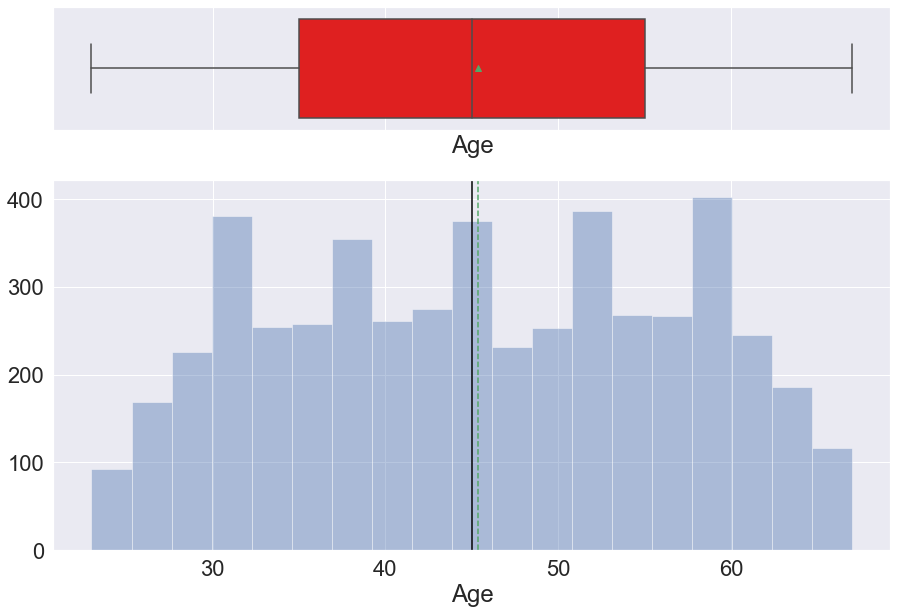

In [33]:
histogram_boxplot(df['Age'])

***
* *Age appears evenly distributed for the most part*
***

**Income**

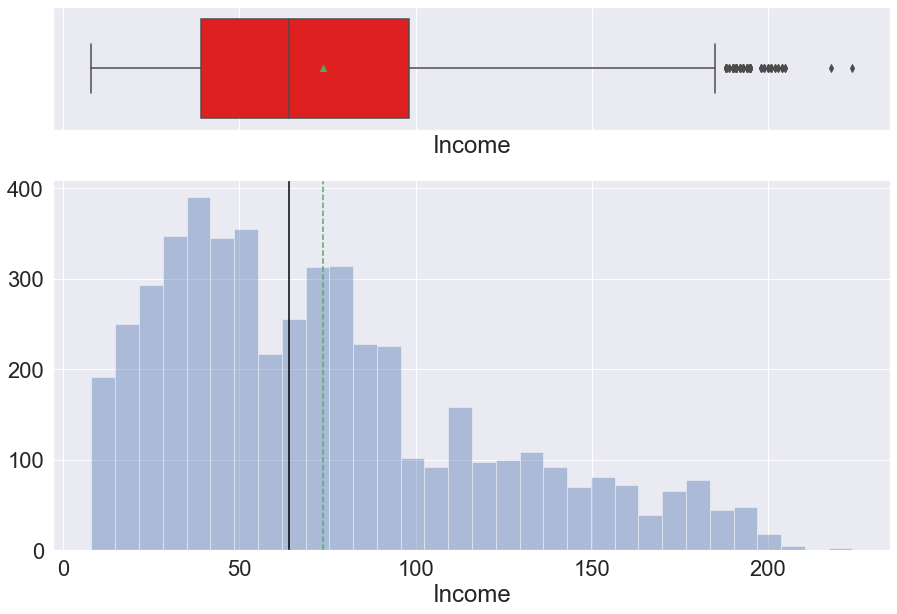

In [34]:
histogram_boxplot(df['Income'])

***
* *Income is right skewed, with half of all customers having an anual income of  64,000 dollars or less*
* *There are some outliers around 200,000 dollars or more.*
***

**Experience**

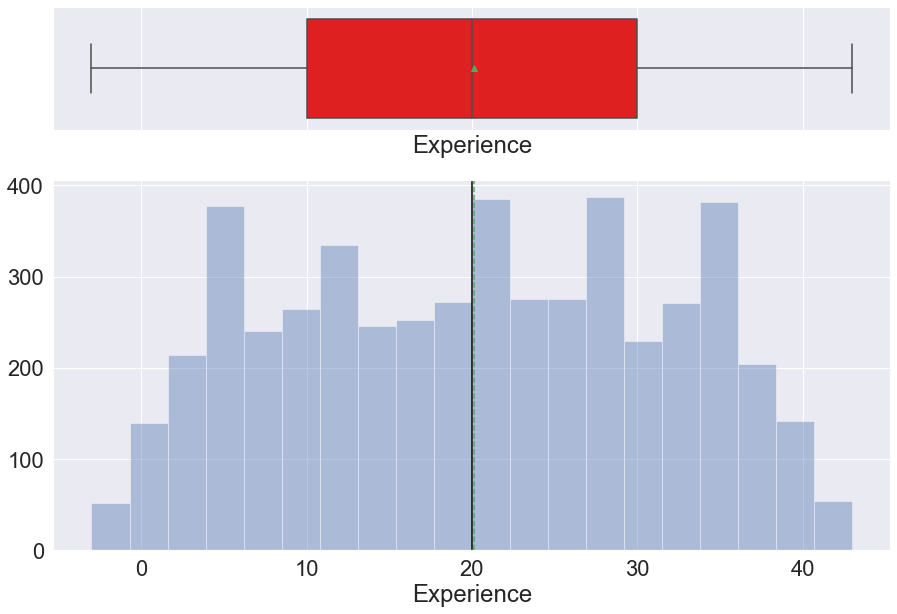

In [40]:
histogram_boxplot(df['Experience'])

***
* *Work appears evenly distributed for the most part*
***

**CCAvg**

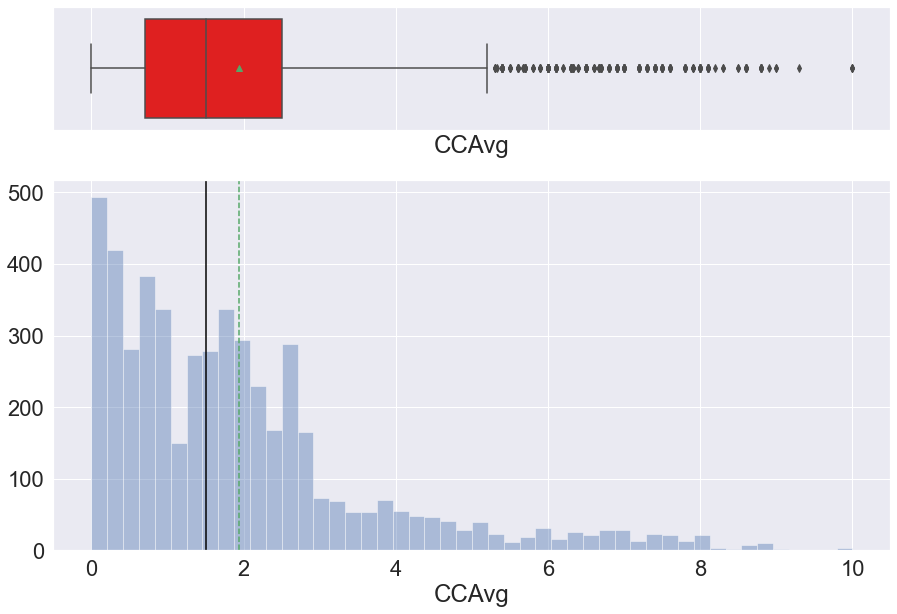

In [36]:
histogram_boxplot(df['CCAvg'])

***
* *CCAvg is heavily skewed to the right*
* *There a quite a few outliers to the right.*
***

In [41]:
# Quantile of CCAvg
df.CCAvg.quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.98,.99,1])

0.10     0.3
0.20     0.5
0.30     0.8
0.40     1.2
0.50     1.5
0.60     1.9
0.70     2.3
0.80     2.8
0.90     4.3
0.95     6.0
0.98     7.3
0.99     8.0
1.00    10.0
Name: CCAvg, dtype: float64

**Mortgage**

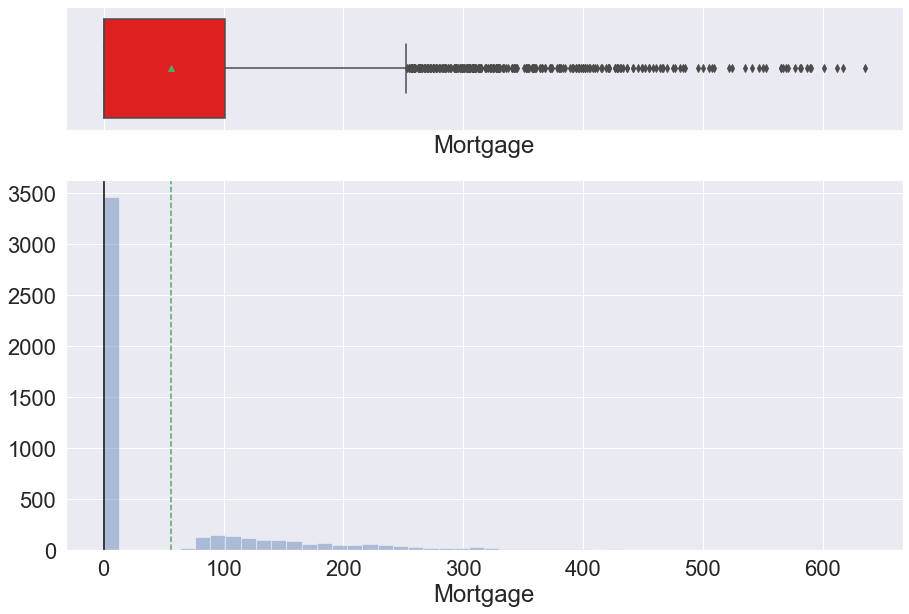

In [37]:
histogram_boxplot(df['Mortgage'])

***
* *Mortgage is heavily skewed to the right*
* *Most customers do not have a mortgage.*
***

In [42]:
# Quantile of CCAvg
df.CCAvg.quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.98,.99,1])

0.10     0.3
0.20     0.5
0.30     0.8
0.40     1.2
0.50     1.5
0.60     1.9
0.70     2.3
0.80     2.8
0.90     4.3
0.95     6.0
0.98     7.3
0.99     8.0
1.00    10.0
Name: CCAvg, dtype: float64

In [59]:
#Remove those without mortgage to better see effect of mortgage amount 
#on loan purchase status
dM = df[df.Mortgage != 0]
print(dM.shape)

(1538, 13)


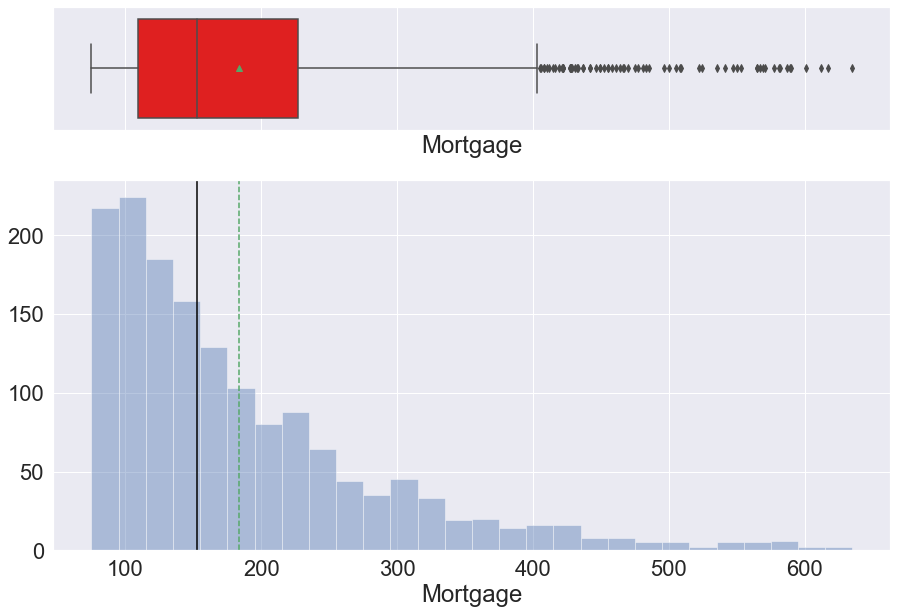

In [61]:
histogram_boxplot(dM['Mortgage'])

***
* *Mortgage values are skewed to the right with several outliers on the right as well*
***

In [63]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

**ZIPCode**

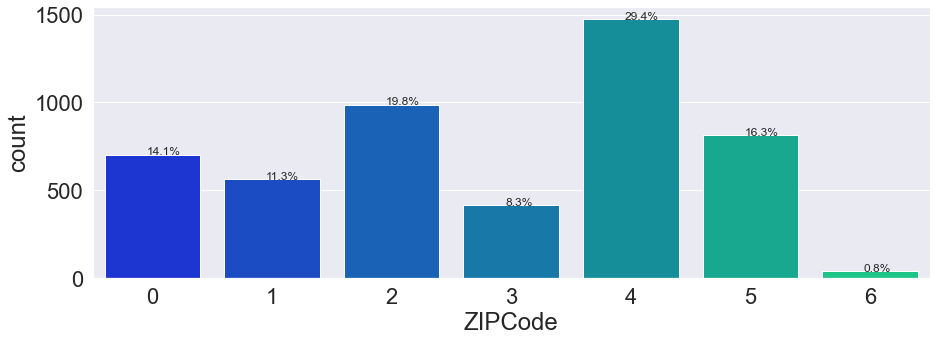

In [64]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["ZIPCode"],palette='winter')
perc_on_bar(ax,df["ZIPCode"])

***
* *The largest customer group lives in region 4.*
* *The smallest customer group lives in region 6.*
***

**Family**

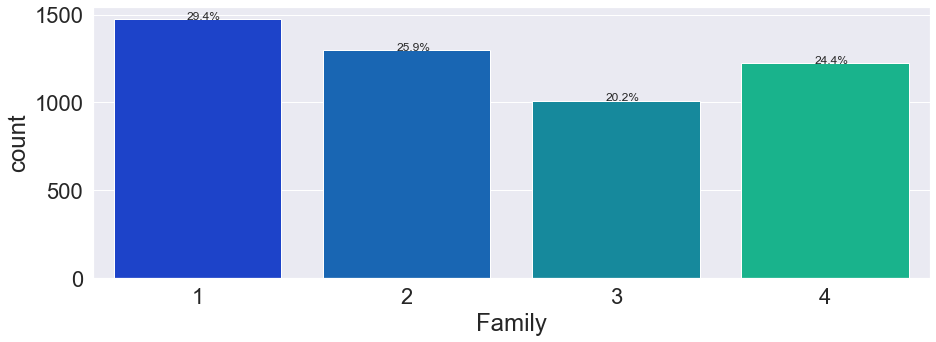

In [65]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["Family"],palette='winter')
perc_on_bar(ax,df["Family"])

***
* *The largest customer group has a family size of 1.*
* *The smallest customer group has a family size of 3.*
***

**Securities Account**

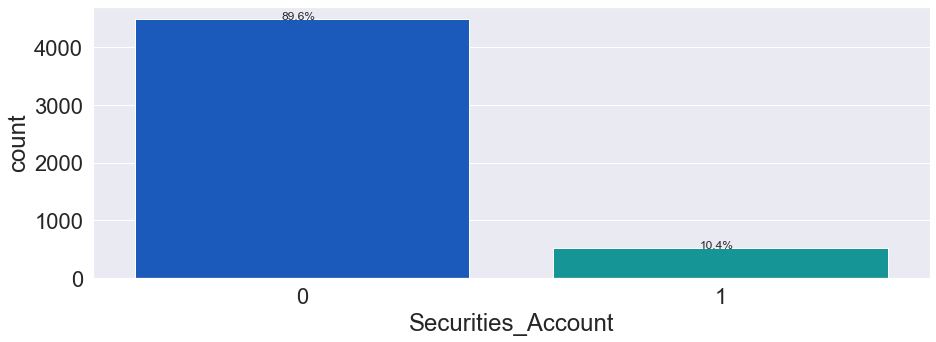

In [66]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["Securities_Account"],palette='winter')
perc_on_bar(ax,df["Securities_Account"])

***
* *Most customers do not have a securities account.*
***

**CD Account**

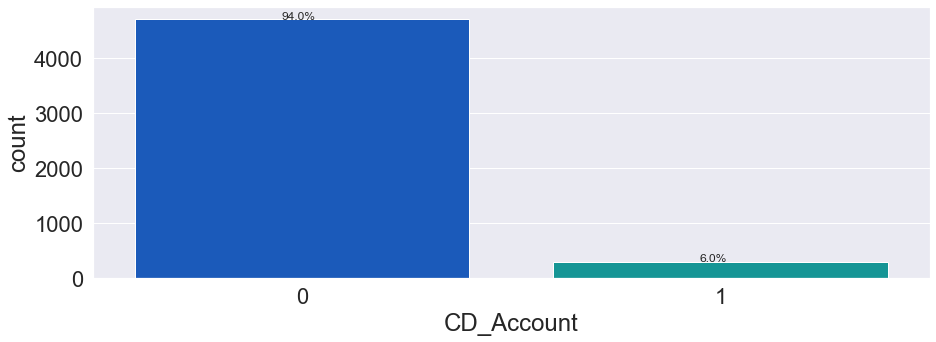

In [67]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["CD_Account"],palette='winter')
perc_on_bar(ax,df["CD_Account"])

***
* *Most customers do not have a CD account.*
***

**Online Banking**

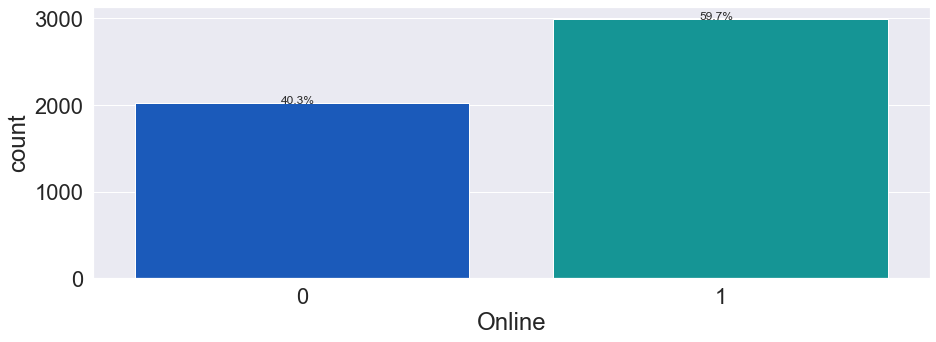

In [68]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["Online"],palette='winter')
perc_on_bar(ax,df["Online"])

***
* *Most customers use online banking.*
***

**Credit Card**

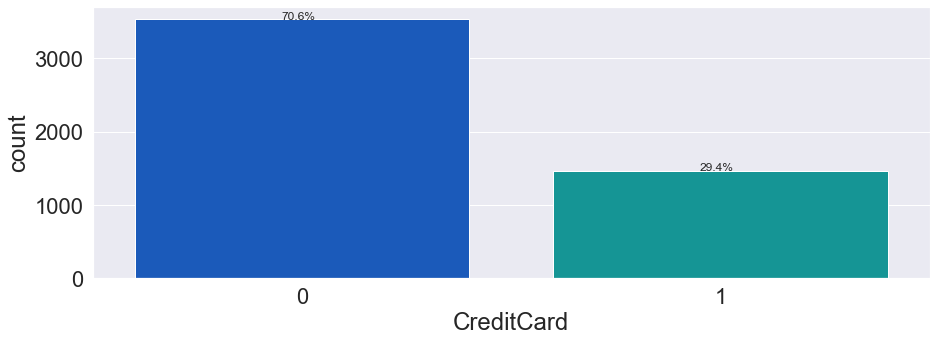

In [69]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["CreditCard"],palette='winter')
perc_on_bar(ax,df["CreditCard"])

***
* *Most do not have a credit card with Universal Banking.*
***

**Personal Loan**

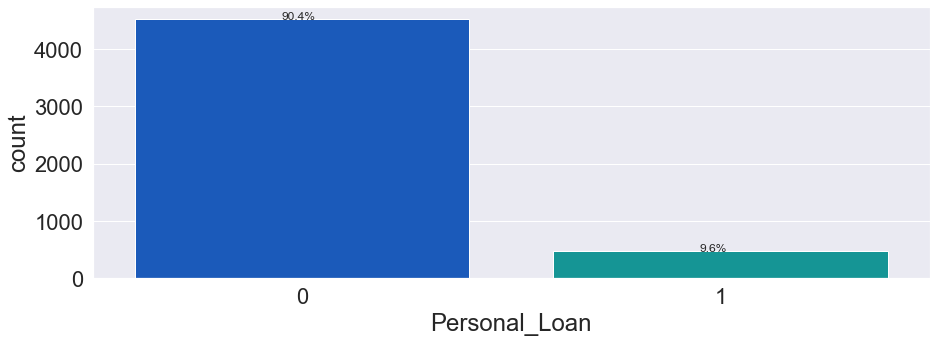

In [70]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["Personal_Loan"],palette='winter')
perc_on_bar(ax,df["Personal_Loan"])

***
* *9 percent of customers purched a loan.*
***

***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Bivariate_Analysis'></a>

## Bivariate Analysis

**Mortgage Occurance vs Personal Loan**

In [48]:
#Compare the occurance of Personal Loans among customers
#that have a mortgage and those that don't
mort = df.copy()

#Convert to string to replace values
mort['Mortgage'] = mort['Mortgage'].astype("string")

#Loop through each item in mortgage column and replace 
#non zero values with one

index = -1
for item in mort['Mortgage']:
    index += 1
    if mort['Mortgage'][index] != '0':
        mort['Mortgage'][index] = mort['Mortgage'][index].replace(mort['Mortgage'][index],'1')


In [49]:
mort['Mortgage'].value_counts()

0    3462
1    1538
Name: Mortgage, dtype: Int64

Personal_Loan     0    1   All
Mortgage                      
0              3150  312  3462
1              1370  168  1538
All            4520  480  5000
------------------------------------------------------------------------------------------


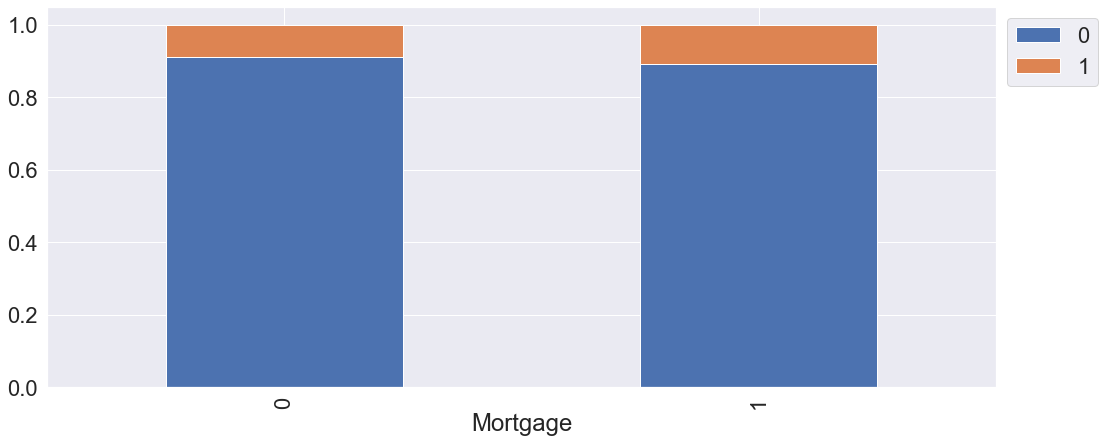

In [50]:
tab1 = pd.crosstab(mort.Mortgage,mort.Personal_Loan,margins=True)
print(tab1)
print('-'*90)
tab = pd.crosstab(mort.Mortgage,mort.Personal_Loan,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(17,7))
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

***
* *There appears to be a slight increase in the proportion of loans purchased among those with mortgages compared to those without mortgages.*
***

**Securities Account vs Personal Loan**

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------


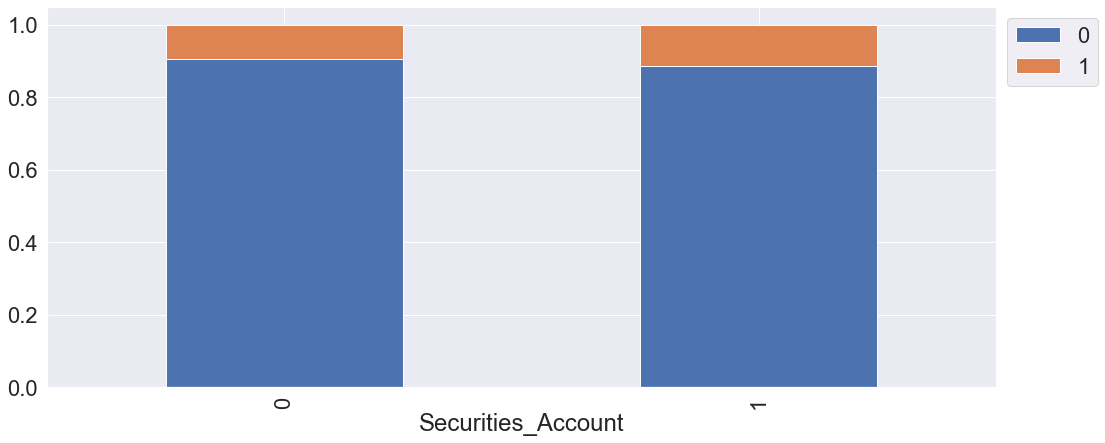

In [46]:
tab1 = pd.crosstab(df.Securities_Account,df.Personal_Loan,margins=True)
print(tab1)
print('-'*90)
tab = pd.crosstab(df.Securities_Account,df.Personal_Loan,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(17,7))
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

***
* *There appears to be a slight increase in the proportion of loans purchased among those with securitites accounts compared to those without securities accounts.*
***

**CD Account vs Personal Loan**

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------


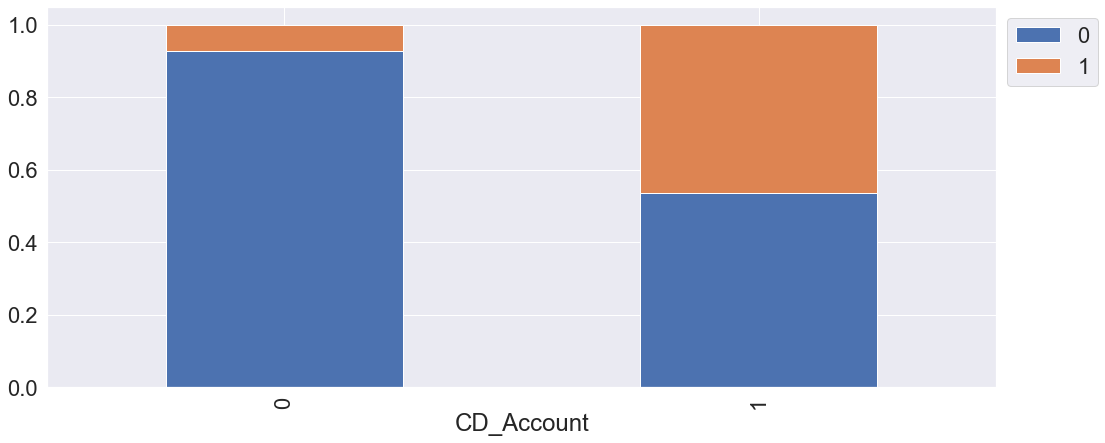

In [51]:
tab1 = pd.crosstab(df.CD_Account,df.Personal_Loan,margins=True)
print(tab1)
print('-'*90)
tab = pd.crosstab(df.CD_Account,df.Personal_Loan,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(17,7))
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

***
* *There is a large increase in the proportion of loans purchased among those with CD accounts compared to those without CD accounts.*
***

**Online Banking vs Personal Loan**

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------


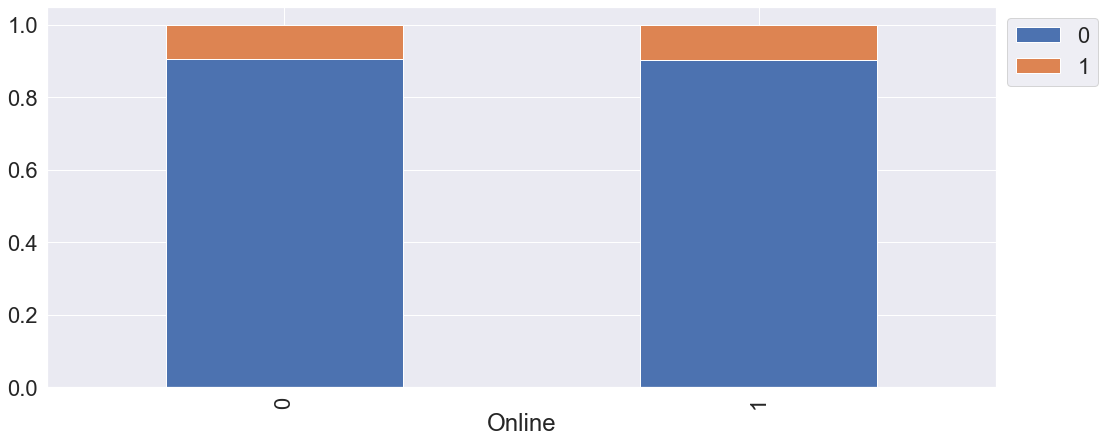

In [52]:
tab1 = pd.crosstab(df.Online,df.Personal_Loan,margins=True)
print(tab1)
print('-'*90)
tab = pd.crosstab(df.Online,df.Personal_Loan,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(17,7))
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

***
* *There does not appear to be a difference in the proportion of loans purchased among those who use online banking and those who don't.*
***

**Credit Card with Universal Bank vs Personal Loan**

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------


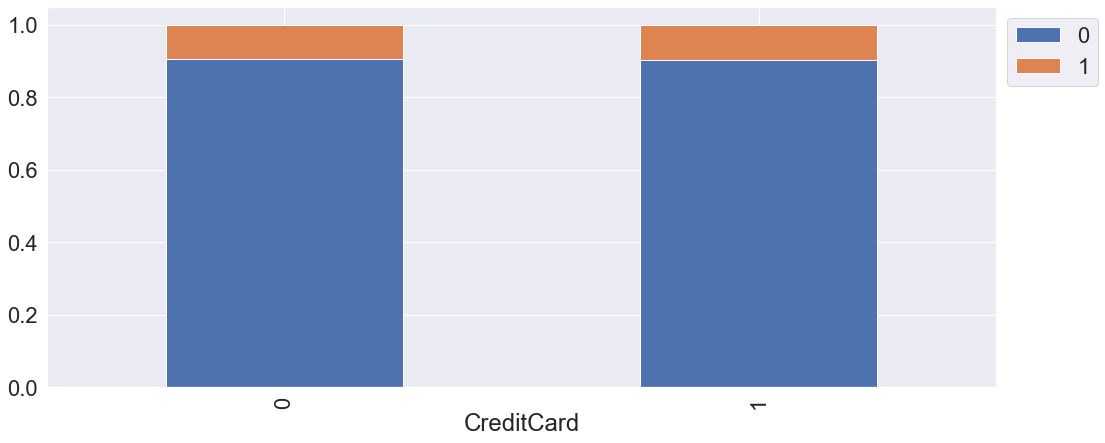

In [53]:
tab1 = pd.crosstab(df.CreditCard,df.Personal_Loan,margins=True)
print(tab1)
print('-'*90)
tab = pd.crosstab(df.CreditCard,df.Personal_Loan,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(17,7))
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

***
* *There does not appear to be a difference in the proportion of loans purchased among those who have a credit card issued by Universal Bank and those who don't.*
***

**Education vs Personal Loan**

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------


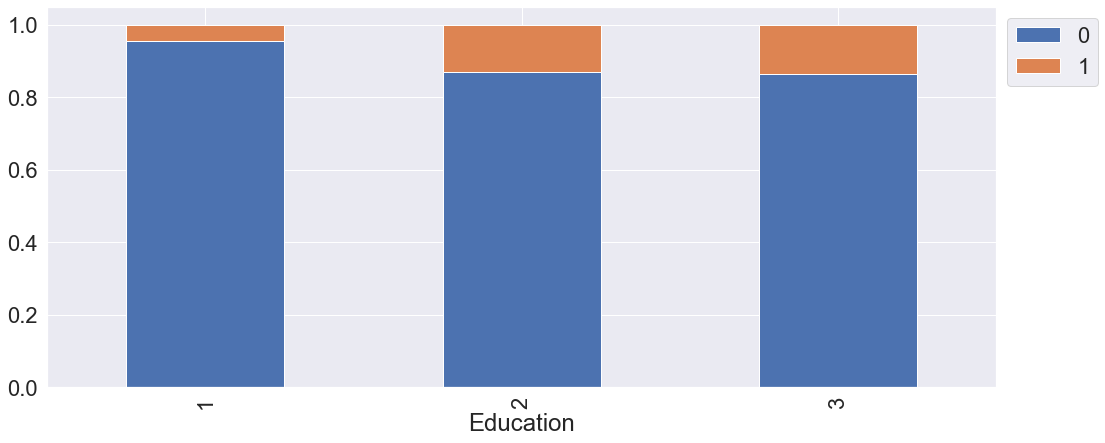

In [54]:
tab1 = pd.crosstab(df.Education,df.Personal_Loan,margins=True)
print(tab1)
print('-'*90)
tab = pd.crosstab(df.Education,df.Personal_Loan,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(17,7))
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

***
* *The proportion of customers who purchase loans appears to increase with education level.*
***

**ZIPCode vs Personal Loan**

Personal_Loan     0    1   All
ZIPCode                       
0               636   67   703
1               510   55   565
2               894   94   988
3               374   43   417
4              1334  138  1472
5               735   80   815
6                37    3    40
All            4520  480  5000
------------------------------------------------------------------------------------------


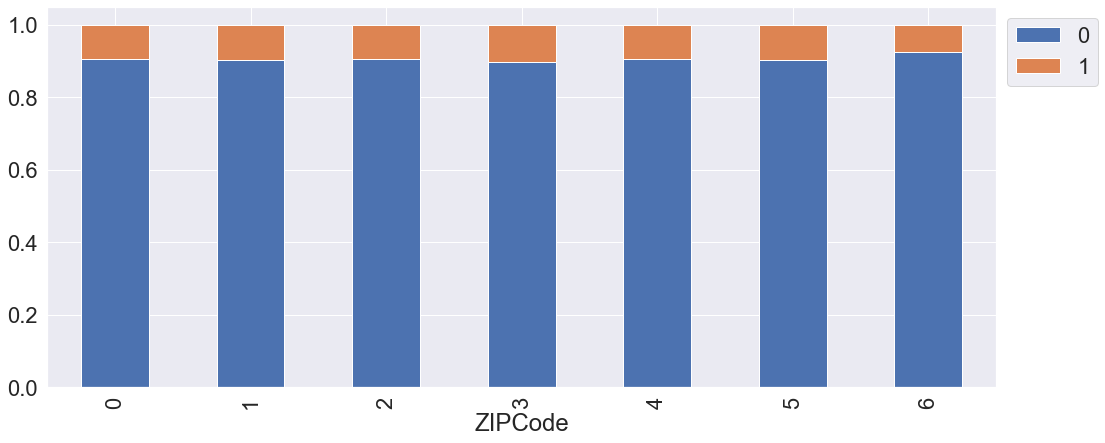

In [55]:
tab1 = pd.crosstab(df.ZIPCode,df.Personal_Loan,margins=True)
print(tab1)
print('-'*90)
tab = pd.crosstab(df.ZIPCode,df.Personal_Loan,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(17,7))
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

***
* *The proportion of customers who purchased loans appears to be lowest in region 6 and highest in region 3.*
***

**Family vs Personal Loan**

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------


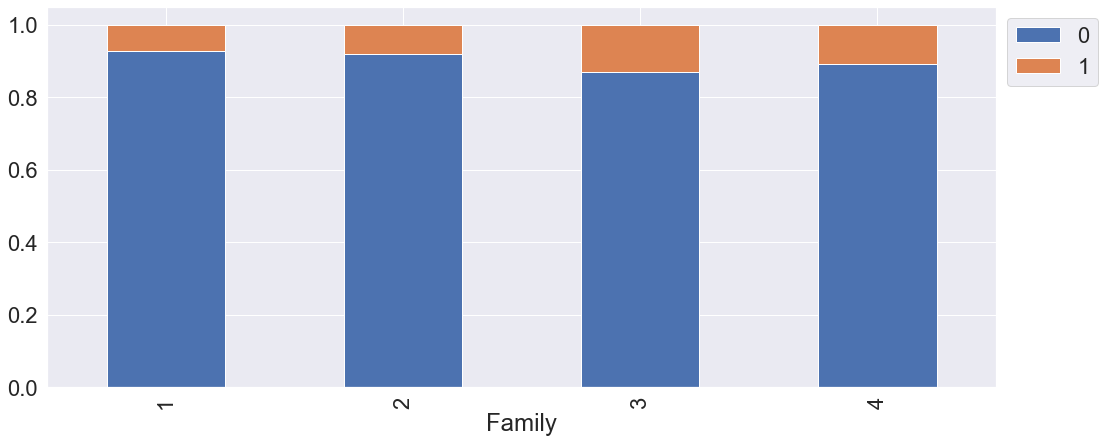

In [56]:
tab1 = pd.crosstab(df.Family,df.Personal_Loan,margins=True)
print(tab1)
print('-'*90)
tab = pd.crosstab(df.Family,df.Personal_Loan,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(17,7))
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

***
* *The proportion of loans purchased appears to be higher among customers with a family size of 3 or 4 than those with a family size of 1 or 2.*
* *Those with a family size of 3 appear to have the largest proportion of purchased loans*
***

**Correlation Heatmap**

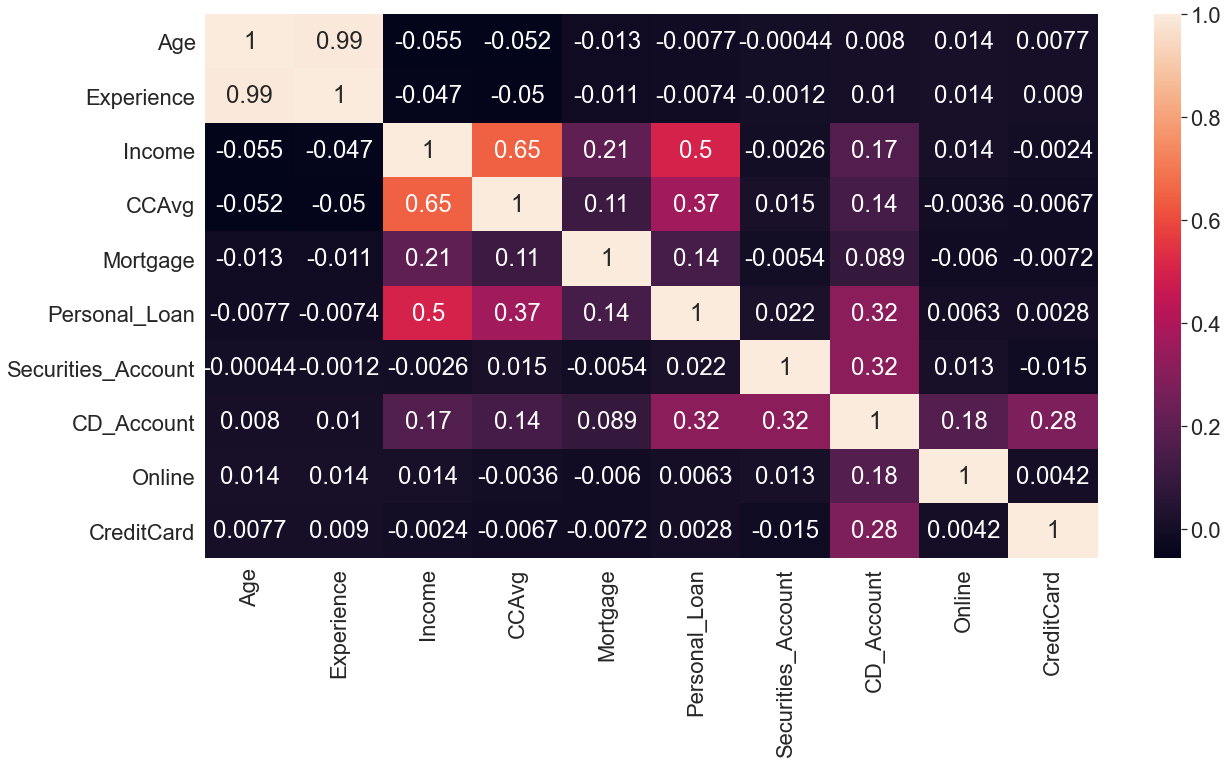

In [72]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

***
* *Experience and age have a strong positive correlation.*
* *Income and credit card usage have a positive correlation.*
* *Personal loan status and Income have moderate positive correlation.*
* *Behind Income and Average Credit Card Usage and CD Account status have the next highes correlations with Personal Loan status.*
***

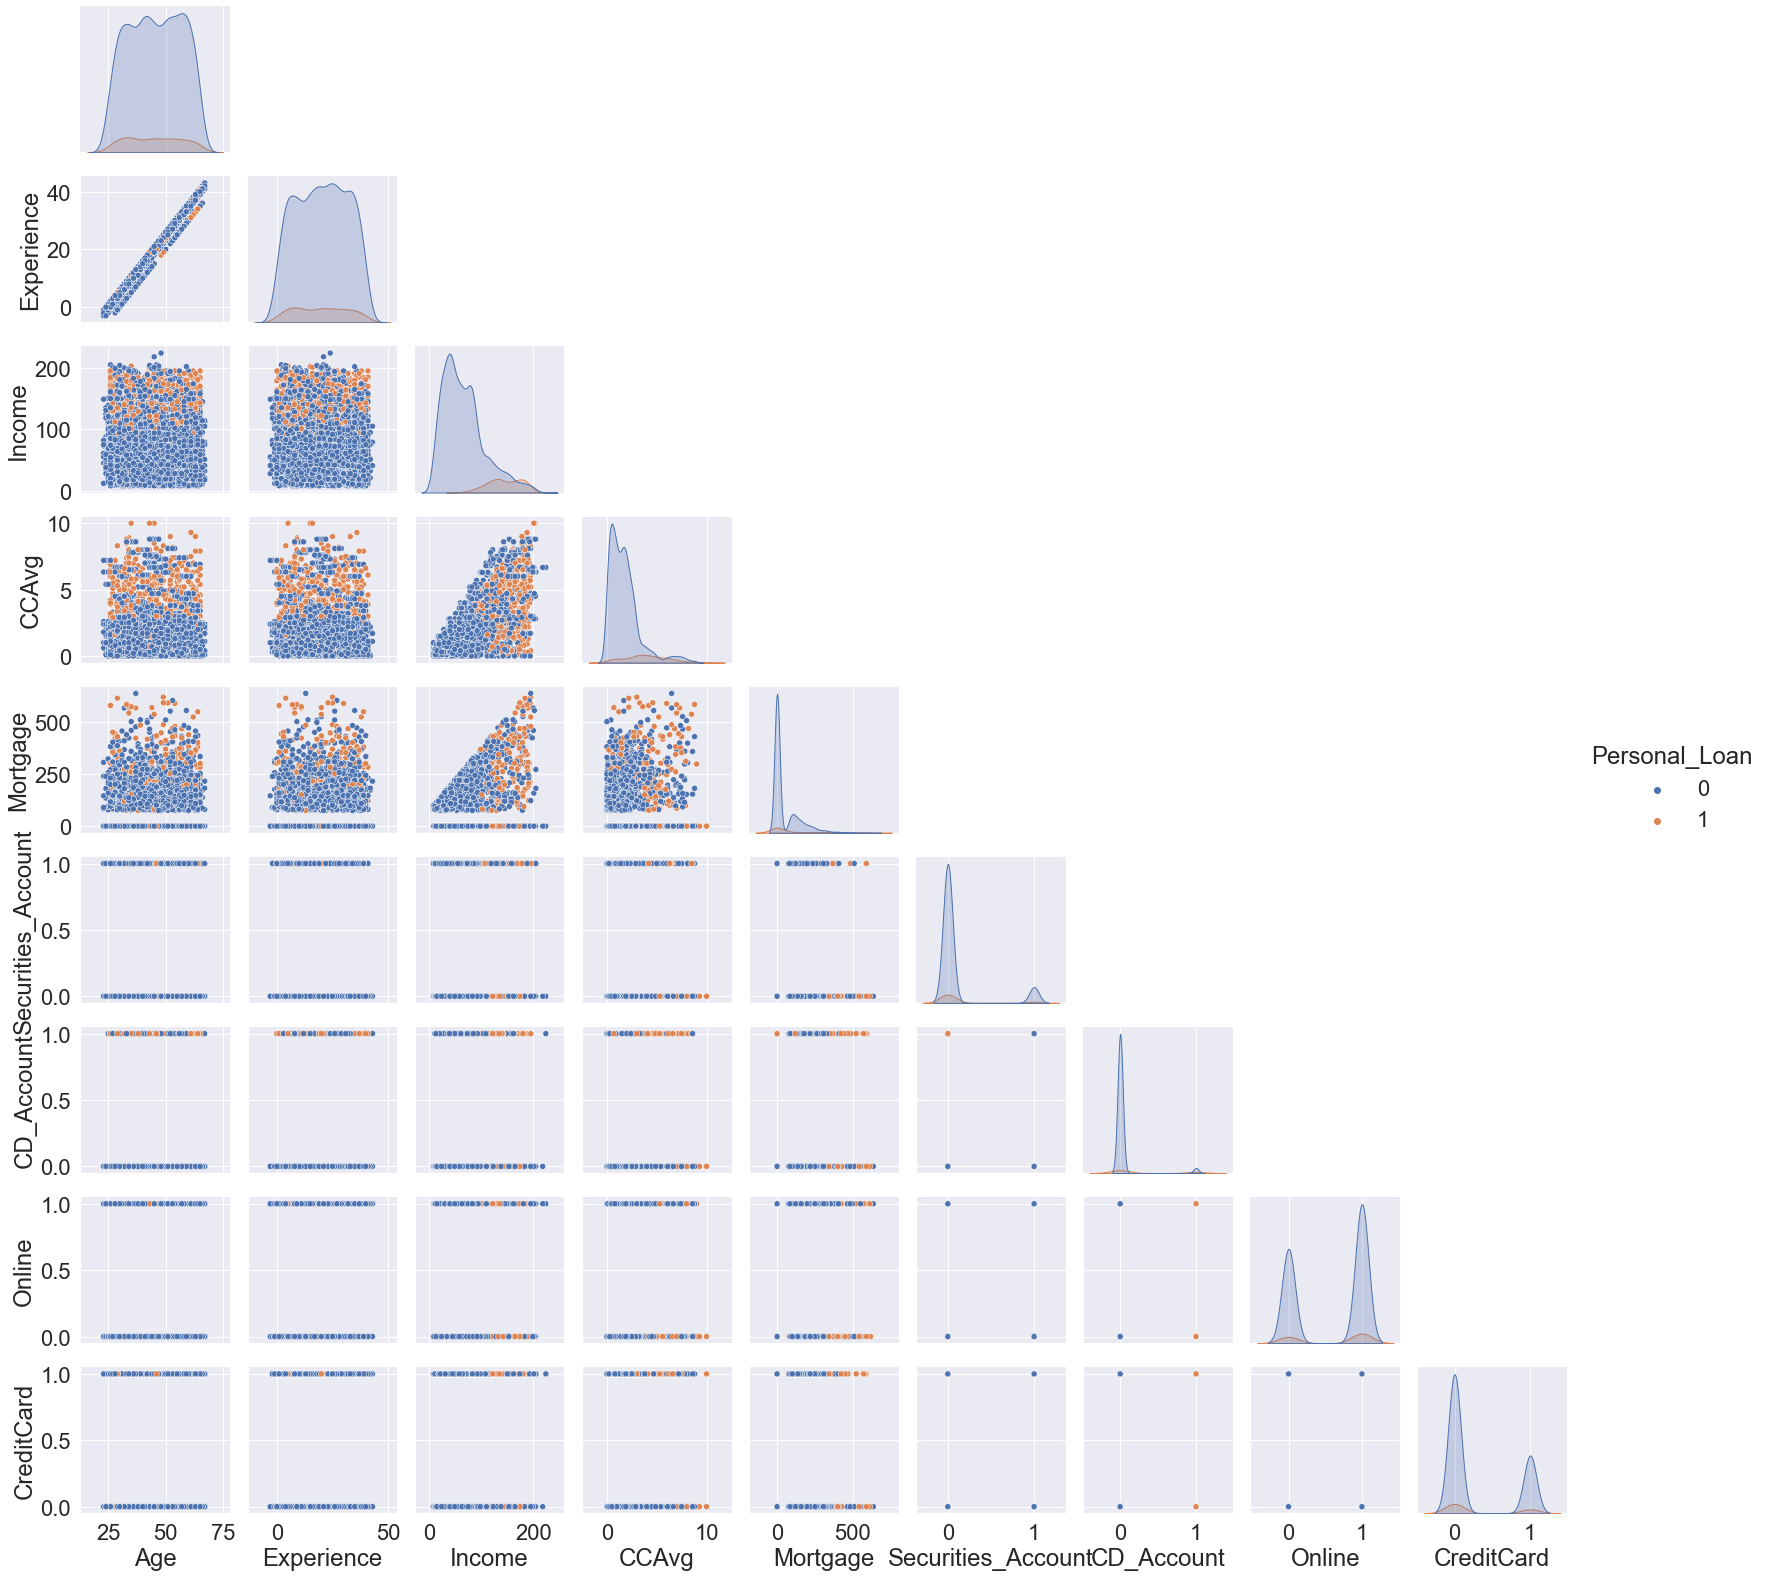

In [76]:
sns.pairplot(data=df,hue="Personal_Loan",corner=True)
plt.show()

***
* *Income & Mortgage and Credit Card Average & Mortgage apear to have the largest combined effect on Personal Loan Status.*
***

**Personal Loan vs Age,Income**

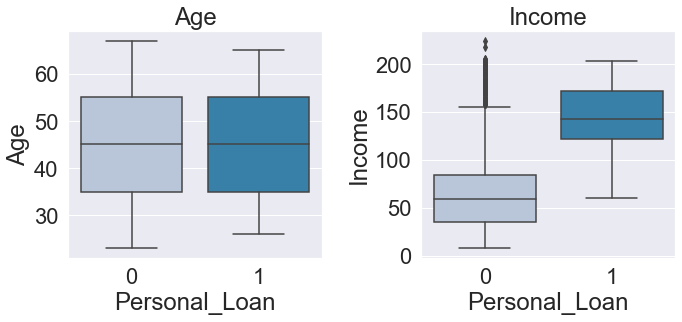

In [77]:
cols = df[['Age','Income']].columns.tolist()
plt.figure(figsize=(10,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,2,i+1)
                     sns.boxplot(df["Personal_Loan"],df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()



***
* *Age does not appear to impact Personal Loan status while income does.*
***

**Personal Loan vs Mortgage,Income**

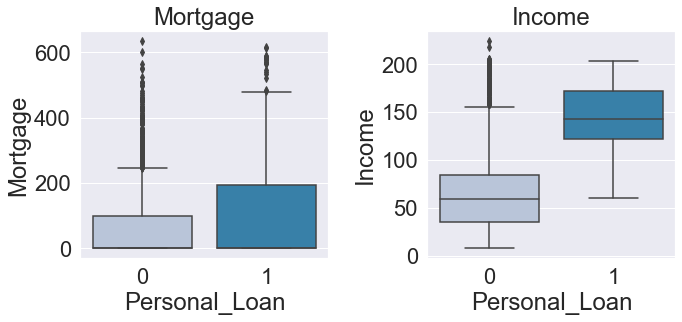

In [78]:
cols = df[['Mortgage','Income']].columns.tolist()
plt.figure(figsize=(10,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,2,i+1)
                     sns.boxplot(df["Personal_Loan"],df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

***
* *Income appears to have a greater effect on Personal Loan status than Mortgage value.*
***

**Personal Loan vs Mortgage,CCAvg**

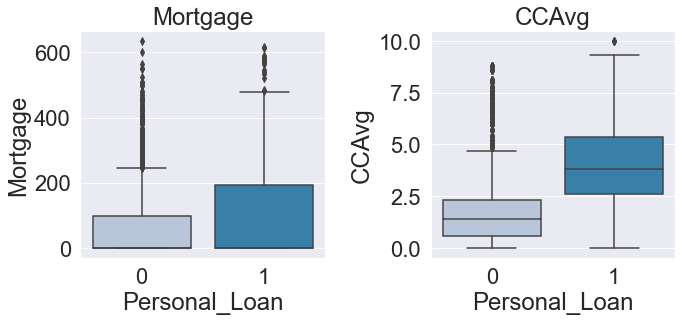

In [79]:
cols = df[['Mortgage','CCAvg']].columns.tolist()
plt.figure(figsize=(10,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,2,i+1)
                     sns.boxplot(df["Personal_Loan"],df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**Personal Loan vs CCAvg,Income**

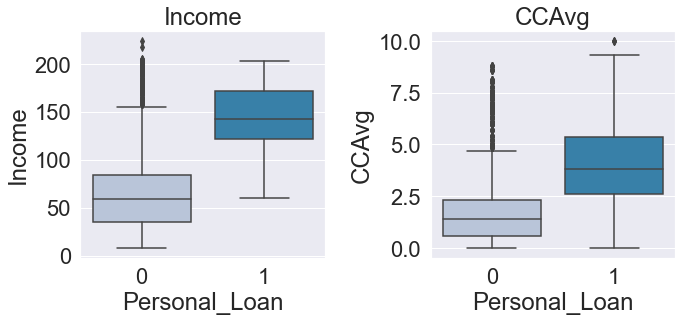

In [80]:
cols = df[['Income','CCAvg']].columns.tolist()
plt.figure(figsize=(10,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,2,i+1)
                     sns.boxplot(df["Personal_Loan"],df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**Personal Loan vs Experience, CCAvg**

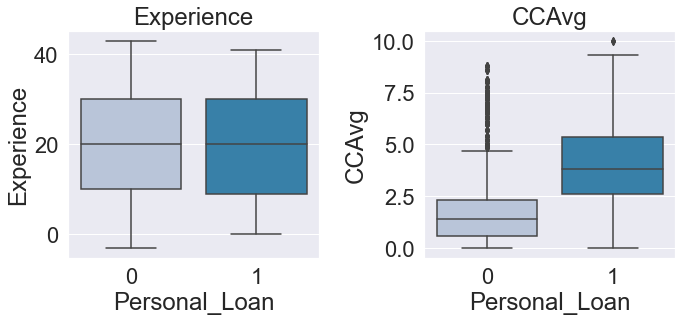

In [81]:
cols = df[['Experience','CCAvg']].columns.tolist()
plt.figure(figsize=(10,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,2,i+1)
                     sns.boxplot(df["Personal_Loan"],df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**Personal Loan vs Experience,Income**

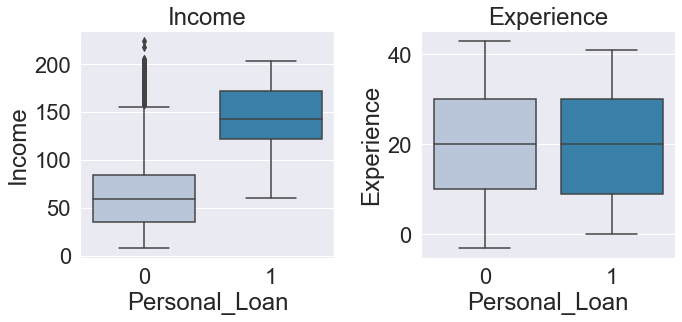

In [82]:
cols = df[['Income','Experience']].columns.tolist()
plt.figure(figsize=(10,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,2,i+1)
                     sns.boxplot(df["Personal_Loan"],df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Initial_Insights'></a>

## Initial Insights on Variable Relationships:

* The larges impacts on Personal Loan status appear to be Income, Average Credit Card Usage, CD Account status, and possibly Mortgage value and/or status.
* Education and family size also appear to affect Personal Loan status from initial analysis.

***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Data_Pre-Processing'></a>

# (2) Data Pre-processing

## Negative Values

In [86]:
#Loop through each item in experience column and replace the value 
#with the median
dx = df.copy()


#Convert to string to replace values
dx['Experience'] = dx['Experience'].astype("string")

index = -1
for item in dx['Experience']:
    index += 1
    if int(item) < 0:
        dx['Experience'][index] = dx['Experience'][index].replace( dx['Experience'][index],'20') #20 is median value

In [88]:
#Convert back to integer
dx['Experience'] = dx['Experience'].astype("int")
dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   int64   
 9   Securities_Account  5000 non-null   int64   
 10  CD_Account          5000 non-null   int64   
 11  Online              5000 non-null   int64   
 12  CreditCard          5000 non-null   int64   
dtypes: category(3), float64(1), int64(9)
memory usage: 406.1 KB


In [89]:
dx.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,1,4,1.6,1,0,0,1,0,0,0
1,45,19,34,0,3,1.5,1,0,0,1,0,0,0
2,39,15,11,4,1,1.0,1,0,0,0,0,0,0
3,35,9,100,4,1,2.7,2,0,0,0,0,0,0
4,35,8,45,1,4,1.0,2,0,0,0,0,0,1


In [90]:
dx.describe()

,Age,Experience,Income,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.327600,73.774200,1.937938,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.253035,46.033729,1.747659,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,11.000000,39.000000,0.700000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


***
* *New minimum for Experience is now 0.*
***

## Outliers

In [97]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [98]:
#Only two columns with relevant outliers; 
#Mortgage is excluded because most of its values are 0
  
numerical_col = ['Income','CCAvg'] 

dx = treat_outliers_all(dx,numerical_col)

In [99]:
dx.shape

(5000, 13)

In [102]:
dx.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49.0,1,4,1.6,1,0,0,1,0,0,0
1,45,19,34.0,0,3,1.5,1,0,0,1,0,0,0
2,39,15,11.0,4,1,1.0,1,0,0,0,0,0,0
3,35,9,100.0,4,1,2.7,2,0,0,0,0,0,0
4,35,8,45.0,1,4,1.0,2,0,0,0,0,0,1


In [101]:
dx.describe()

,Age,Experience,Income,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.327600,73.617400,1.831338,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.253035,45.626122,1.452215,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,11.000000,39.000000,0.700000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,186.500000,5.200000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**New Correlation Heatmap**

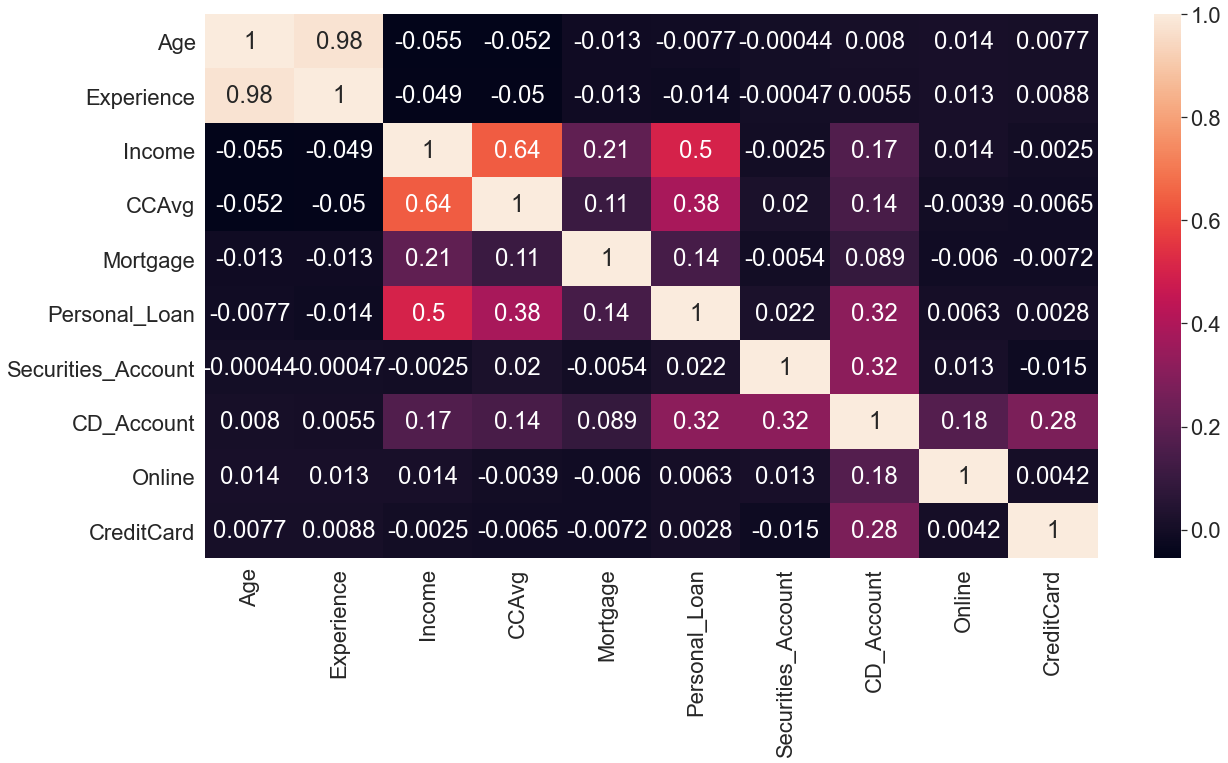

In [103]:
plt.figure(figsize=(20,10))
sns.heatmap(dx.corr(),annot=True)
plt.show()

***
* *Relevant correlations change littel if at all.*
***

## Feature Engineering

* Zipcodes, Family, and Education where altered above during the initial analysis phase
* Now dummy values will be added

In [104]:
#Drop Age column as it has a high linear relationship with experience, 
#but does not appear to have much effect on Personal Loan status

dx.drop(['Age'], axis=1,inplace=True)


In [105]:
dx.head()

,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,49.0,1,4,1.6,1,0,0,1,0,0,0
1,19,34.0,0,3,1.5,1,0,0,1,0,0,0
2,15,11.0,4,1,1.0,1,0,0,0,0,0,0
3,9,100.0,4,1,2.7,2,0,0,0,0,0,0
4,8,45.0,1,4,1.0,2,0,0,0,0,0,1


**Create Dummy Variables**

In [106]:
dummy_data = pd.get_dummies(dx, columns=['ZIPCode','Family','Education'],drop_first=True)
dummy_data.head()

,Experience,Income,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,ZIPCode_1,ZIPCode_2,ZIPCode_3,ZIPCode_4,ZIPCode_5,ZIPCode_6,Family_2,Family_3,Family_4,Education_2,Education_3
0,1,49.0,1.6,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,19,34.0,1.5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,15,11.0,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,9,100.0,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,8,45.0,1.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0


## Create Testing and Training Sets (Define X/Y Variables)

In [107]:
column_names = list(dummy_data.columns)
column_names.remove('Personal_Loan')                     # Keep only names of features by removing the name of target variable
feature_names = column_names
print(feature_names)

['Experience', 'Income', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_1', 'ZIPCode_2', 'ZIPCode_3', 'ZIPCode_4', 'ZIPCode_5', 'ZIPCode_6', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3']


In [108]:
X = dummy_data.drop('Personal_Loan',axis=1) #Labels Dependent Variables
y = dummy_data['Personal_Loan'] # Labels Target Variable

# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3500, 19) (1500, 19)


***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Logistic_Regression_Model'></a>

# (3) Logistic Regression Model

### Model Evaluation Criterion:


* As AllBank is trying to convert existing customers and not at high risk for losing customers or owing money the costs of False Positives and False Negatives are low.
* Therefore Accuracy is an adequate test metric.

<a id='Model_Using_Sklearn'></a>

## Fit Logistic Regression Model (Sklearn)

In [110]:
logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000 
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.3s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

## Evaluate and Improve Logistic Regression Model

### Training Predictions

In [114]:
#Predict for train set
pred_train = logreg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix
#mat_train = confusion_matrix(y_train,pred_train)


def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_actual,y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['Loan','No Loan']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



### Training Confusion Matrix

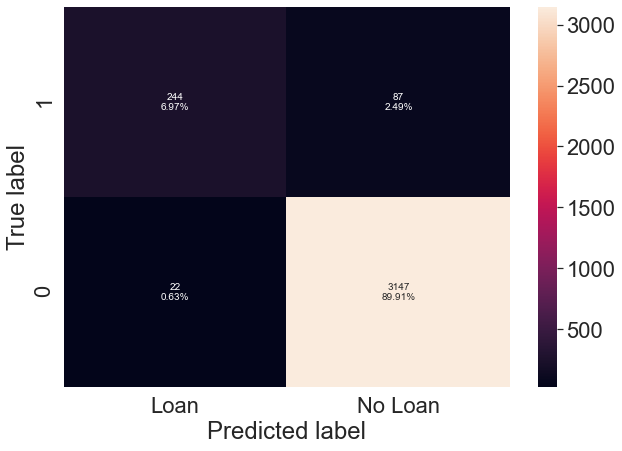

In [115]:
# Confusion matrix on training set
make_confusion_matrix(y_train,pred_train)

### Testing Predictions

In [117]:
#Predict for test set
pred_test = logreg.predict(X_test)

### Testing Confusion Matrix

confusion matrix = 



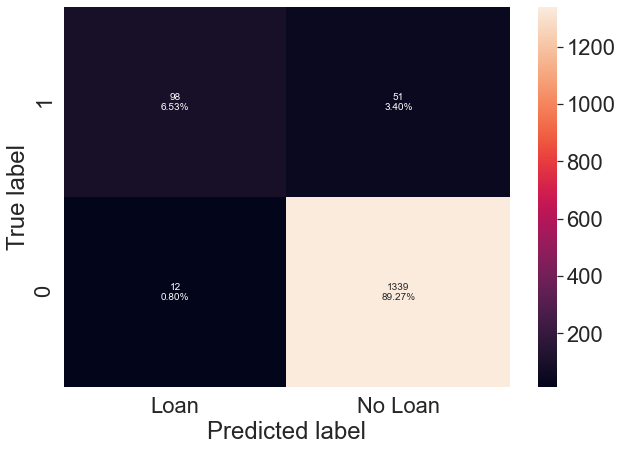

In [118]:
print("confusion matrix = \n")
make_confusion_matrix(y_test,pred_test)

### Test Metrics 

In [119]:
#Accuracy with a threhold of 0.5
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))

Accuracy on train data: 0.9688571428571429
Accuracy on test data: 0.958


In [123]:
#Calculate Sensitivity (TP/(TP+FN))
Train_Sens = (244/(244+22))
Test_Sens = (98/(98+12))
print('Sensitivity on train data:',Train_Sens)
print('Sensitivity on test data:',Test_Sens)

Sensitivity on train data: 0.9172932330827067
Sensitivity on test data: 0.8909090909090909


In [122]:
#Calculate Precision (TP/(TP+FP))
Train_Pre = (244/(244+87))
Test_Pre = (98/(98+51))
print('Precision on train data:',Train_Pre)
print('Precision on test data:',Test_Pre)

Precision on train data: 0.7371601208459214
Precision on test data: 0.6577181208053692


**AUC ROC curve**

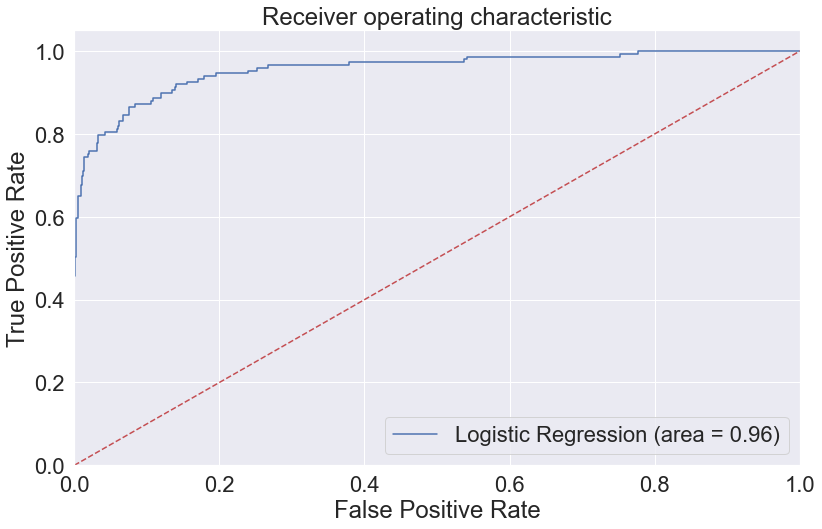

In [124]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Choose Optimal Threshold

In [125]:
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.10015856915901986


In [126]:
target_names = ['Loan', 'No Loan']
y_pred_tr = (logreg.predict_proba(X_train)[:,1]>optimal_threshold).astype(int)
y_pred_ts = (logreg.predict_proba(X_test)[:,1]>optimal_threshold).astype(int)

### Updated Confusion matrix

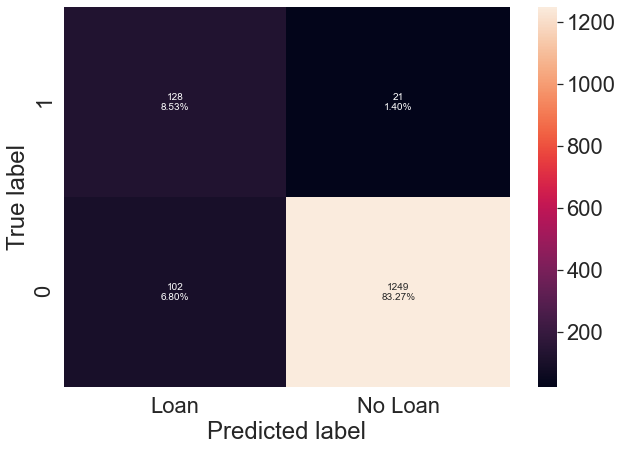

In [140]:
make_confusion_matrix(y_test,y_pred_ts)

### Recalculate Metrics 

In [128]:
#Accuracy with optimal threhold
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(y_train, y_pred_tr) )
print('Accuracy on test data:',accuracy_score(y_test, y_pred_ts))

Accuracy on train data: 0.9185714285714286
Accuracy on test data: 0.918


***
* *Accuracy on Test Data is closer to Accuracy on Training Data.*
* *True Positives increased from 6.53% to 8.53% and False Positives decreased from 3.40% to 1.40%.
***

### Remove Multicollinearity and Insignificant Variables

In [134]:
# dataframe with numerical columns only
num_feature_set = X.copy()
from statsmodels.tools.tools import add_constant
num_feature_set = add_constant(num_feature_set)

In [136]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                 21.076522
Experience             1.010567
Income                 1.850244
CCAvg                  1.697176
Mortgage               1.052619
Securities_Account     1.137934
CD_Account             1.337834
Online                 1.041238
CreditCard             1.111095
ZIPCode_1              1.602262
ZIPCode_2              1.932687
ZIPCode_3              1.463024
ZIPCode_4              2.190400
ZIPCode_5              1.813852
ZIPCode_6              1.050944
Family_2               1.402193
Family_3               1.379922
Family_4               1.427468
Education_2            1.280166
Education_3            1.250165
dtype: float64



***
* *No Variables exhibit high collinearity.*
***

<a id='Model_Using_Statsmodel'></a>

## Fit Logistic Regression Model (Statsmodel)

In [138]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.225335
         Iterations 8


**Summary**

In [139]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3481
Method:                           MLE   Df Model:                           18
Date:                Sat, 17 Apr 2021   Pseudo R-squ.:                  0.2801
Time:                        05:34:04   Log-Likelihood:                -788.67
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                1.159e-118
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Experience            -0.0784      0.006    -13.396      0.000      -0.090      -0.067
Income                 0.0191      0.002     11.144      0.000       0.016       0.022
CCAvg               

**Interpretation of coefficients with respect to Income, CCAvg, CD_Account, and Education**

* Each of the above independenct variables has a positive coefficient indicating the increased likelihood a customer will take out a loan as the variables increase.
* This effectis strongest in CD Account status.
* Education of 2 and 3 are the next largest predictors.
* Income is the least.

**Odds Ratio and Probability**

In [141]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [142]:
# FIlter by significant p-value (pval <0.005) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.005
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
CD_Account,4.83,124.66,0.99,0.00
Education_3,0.65,1.91,0.66,0.00
Education_2,0.65,1.91,0.66,0.00
CCAvg,0.16,1.17,0.54,0.00
Income,0.02,1.02,0.50,0.00
Experience,-0.08,0.92,0.48,0.00
Family_4,-0.58,0.56,0.36,0.00
Family_2,-1.31,0.27,0.21,0.00
Online,-1.54,0.21,0.18,0.00
CreditCard,-1.86,0.16,0.14,0.00


***
* *The Odds Ratio and Probability Confirm what the coefficients indicated.* 
***

**Significant Variables**

In [143]:
# Overall most significant varaibles
pval_filter = lgcoef['pval']<=0.0001
imp_vars = lgcoef[pval_filter].index.tolist()

# Overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '_' in col:
        first_part = col.split('_')[0]
        for c in df.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
 

start = '\033[1m'
end = '\033[95m'
print('Most significant varaibles category wise are :\n',lgcoef[pval_filter].index.tolist())
print('*'*120)

print(start+'Most overall significant varaibles  are '+end,':\n',sig_var)

Most significant varaibles category wise are :
 ['CD_Account', 'Education_3', 'Education_2', 'Income', 'Experience', 'Family_2', 'Online', 'CreditCard', 'ZIPCode_3', 'ZIPCode_1', 'Securities_Account', 'ZIPCode_2', 'ZIPCode_5', 'ZIPCode_4']
************************************************************************************************************************
Most overall significant varaibles  are  :
 ['CD_Account', 'Education', 'Family', 'ZIPCode', 'Securities_Account']


## Evaluate and Improve Logistic Regression Model

### Training Predictions

In [144]:
pred_train = lg.predict(X_train)
pred_train = np.round(pred_train)

### Training Confusion Matrix

confusion matrix = 



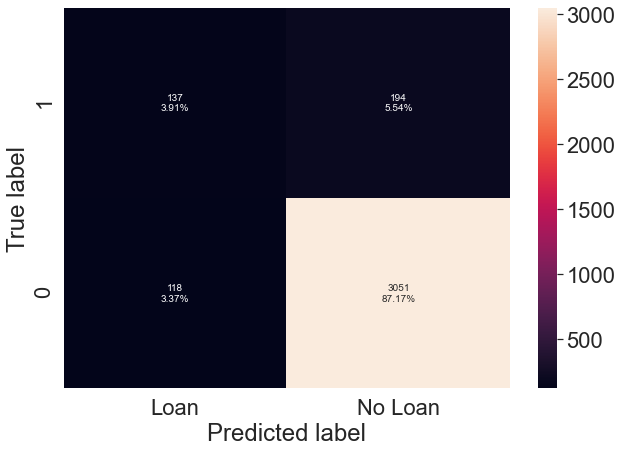

In [146]:
print("confusion matrix = \n")
make_confusion_matrix(y_train,pred_train )

### Testing Predictions

In [148]:
pred_ts = lg.predict(X_test)#predict(X_train)
pred_ts = np.round(pred_ts)
# mat_tst = confusion_matrix(y_test,np.round(pred_ts))


### Testing Confusion Matrix

confusion matrix = 



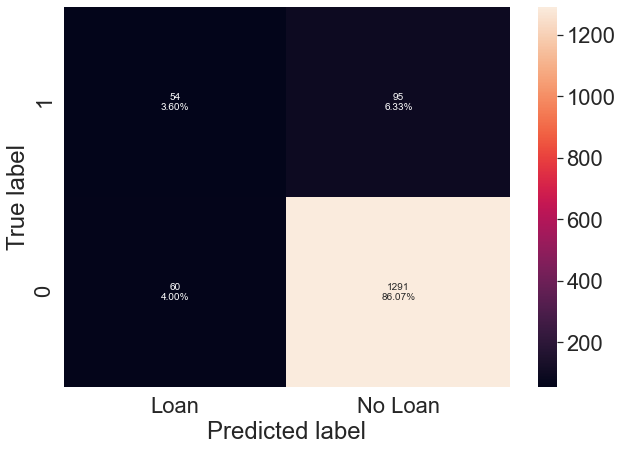

In [149]:
print("confusion matrix = \n")
make_confusion_matrix(y_test,pred_ts )

**Test Metrics**

In [152]:
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_ts))

Accuracy on train data: 0.9108571428571428
Accuracy on test data: 0.8966666666666666


**AUC ROC Curve**

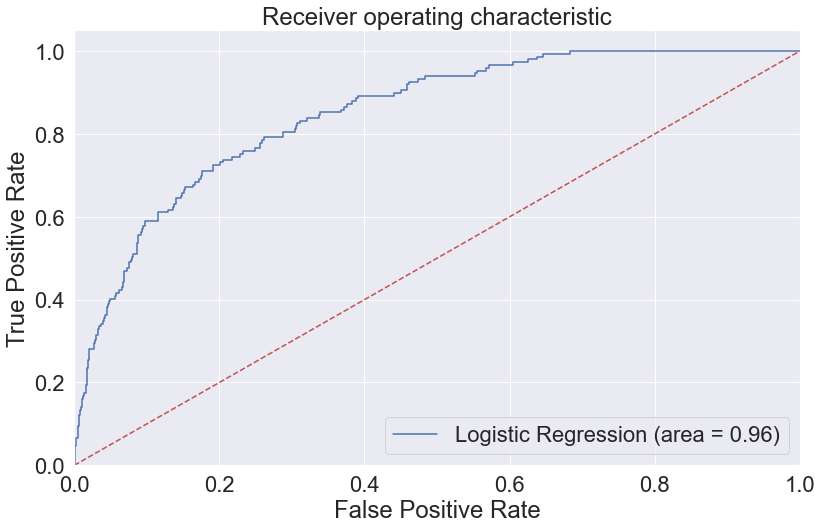

In [151]:
fpr, tpr, thresholds = roc_curve(y_test, lg.predict(X_test))
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Optimal threshold**

In [154]:
pred_train = lg.predict(X_train)
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, pred_train)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.07429396017164337


In [155]:
target_names = ['Loan', 'No Loan']
y_pred_tr = (lg.predict(X_train)>optimal_threshold).astype(int)
y_pred_ts = (lg.predict(X_test)>optimal_threshold).astype(int)

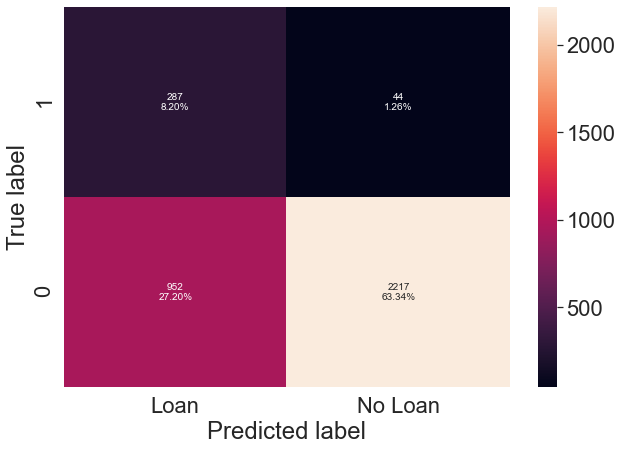

In [156]:
make_confusion_matrix(y_train,y_pred_tr )

***
[[Table of Contents](#Table_of_Contents)]
***

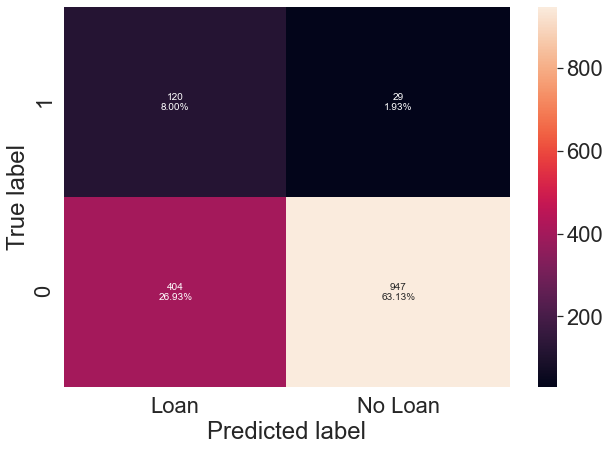

In [157]:
make_confusion_matrix(y_test,y_pred_ts)

<a id='Decision_Tree_Model'></a>

In [158]:
#Accuracy with optimal threshold
print('Accuracy on train data:',accuracy_score(y_train,y_pred_tr) )
print('Accuracy on test data:',accuracy_score(y_test,y_pred_ts))

Accuracy on train data: 0.7154285714285714
Accuracy on test data: 0.7113333333333334


***
* After choosing optimal threshold , true positives has increased from 3.6% to 8% while false positive has decreased from 6.3% to 1.9%
* The accuracy on test data is 71%.
***

# (4) Decision Tree Model

<a id='Build_Unpruned_Tree'></a>

## (a) Build Unpruned Tree

In [161]:
print(X_train.shape, X_test.shape)

(3500, 19) (1500, 19)


In [162]:
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

In [163]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

## Score Tree

### Make Confusion Matrix

In [167]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

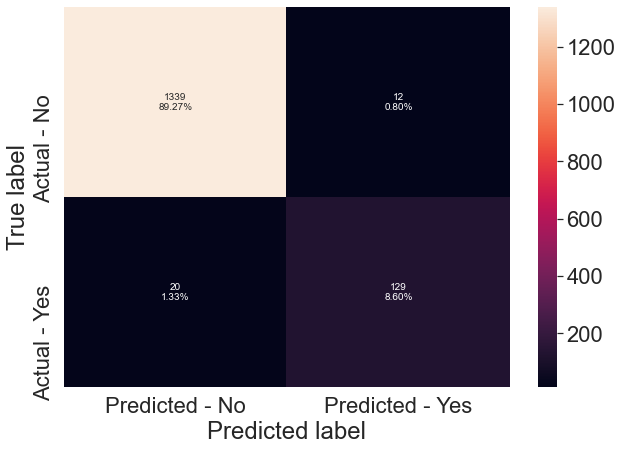

In [168]:
make_confusion_matrix(model,y_test)

In [169]:
y_train.value_counts(1)

0   0.91
1   0.09
Name: Personal_Loan, dtype: float64

### Test Appropriate Metric (Accuracy/Recall)

In [177]:
# accuracy on training set
print("Accuracy on train set", model.score(X_train,y_train))

# accuracy on test set
print("Accuracy on test set", model.score(X_test,y_test))

Accuracy on train set 1.0
Accuracy on test set 0.9786666666666667


In [178]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [179]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.8657718120805369


### Visualize Decision Tree (image and text)

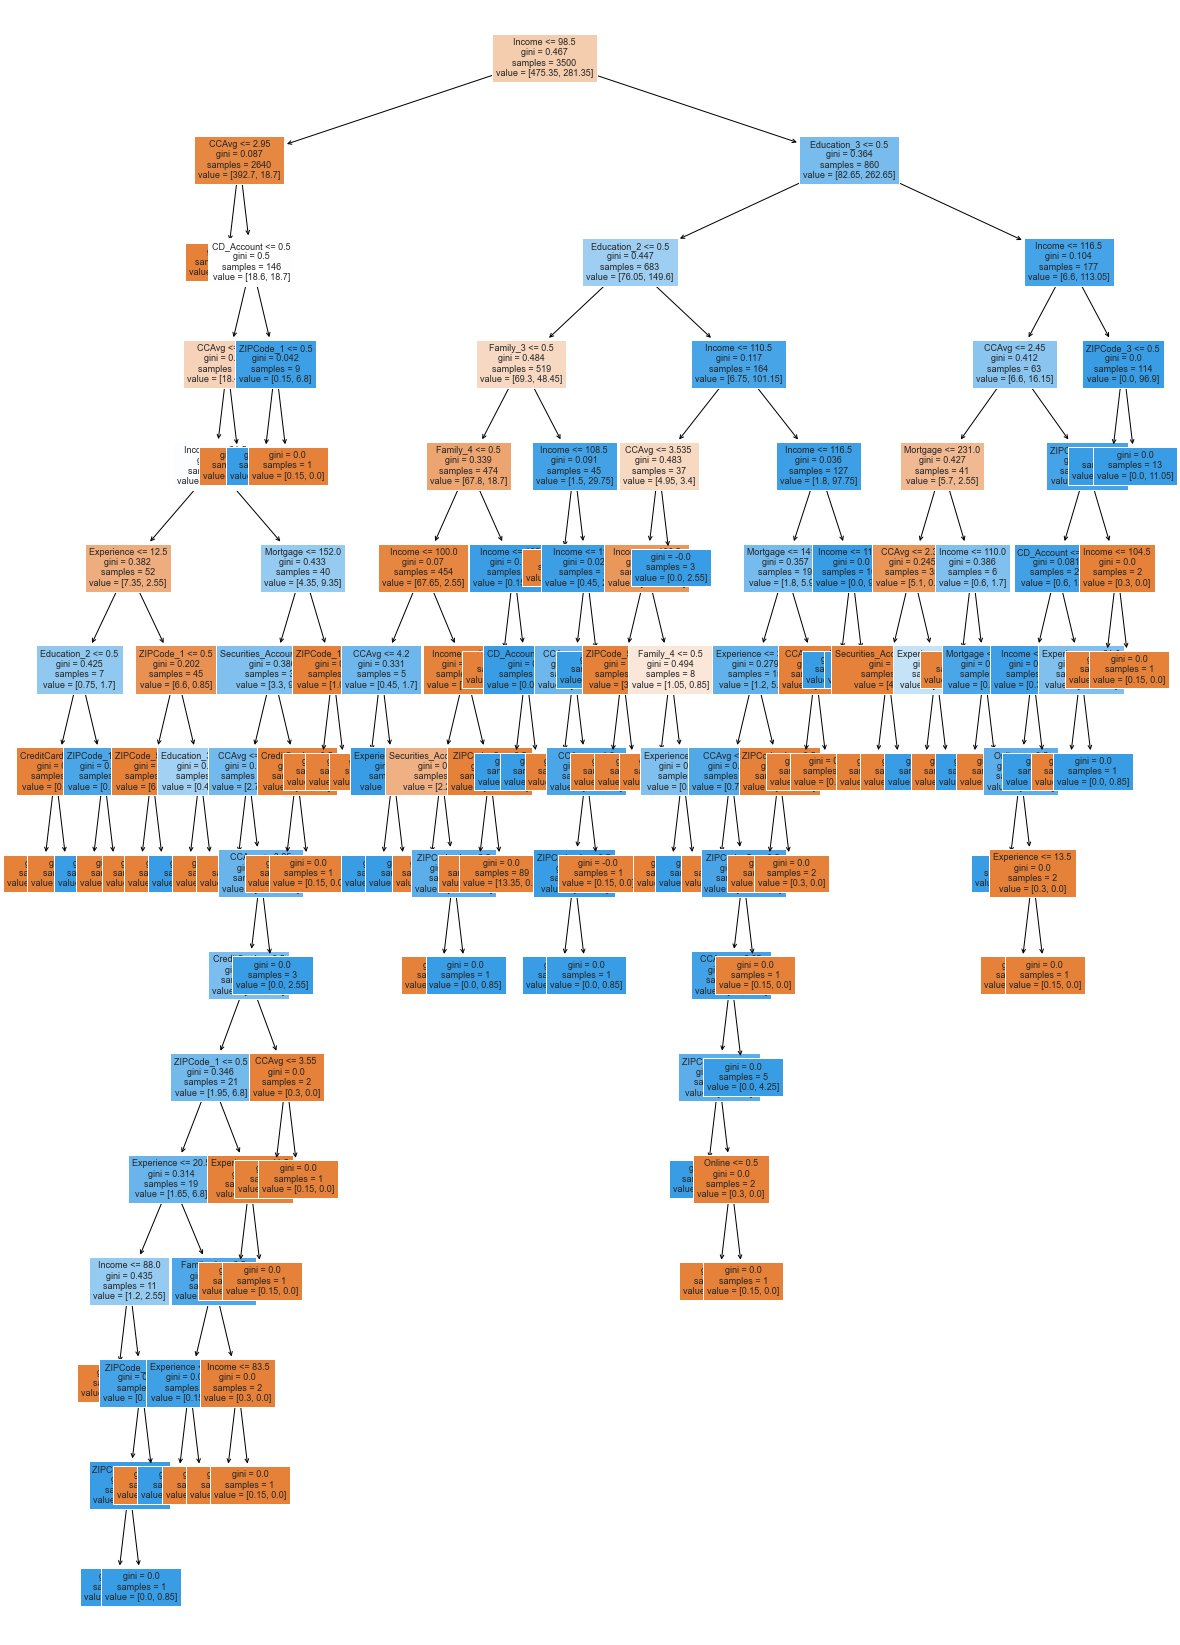

In [170]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [171]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Experience <= 12.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- CreditCard <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |   |   |   |   |   |--- CreditCard >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- ZIPCode_1 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |   |   |   |   |--- ZIPCode_1 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |--- Experience >  12.50
|   |   |   |   |   |   |--- ZIPCode_1 <= 0.50
|   |   |   |   |   |   |   |--- ZIPCode_5 <= 0.50
|   |   |   |   |   |  

### Display Gini Scores

In [172]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                    Imp
Income             0.60
Education_2        0.09
CCAvg              0.08
Family_4           0.07
Family_3           0.07
Education_3        0.04
CD_Account         0.01
Experience         0.01
Mortgage           0.01
ZIPCode_1          0.01
Securities_Account 0.00
ZIPCode_3          0.00
Online             0.00
CreditCard         0.00
ZIPCode_2          0.00
ZIPCode_5          0.00
ZIPCode_4          0.00
ZIPCode_6          0.00
Family_2           0.00


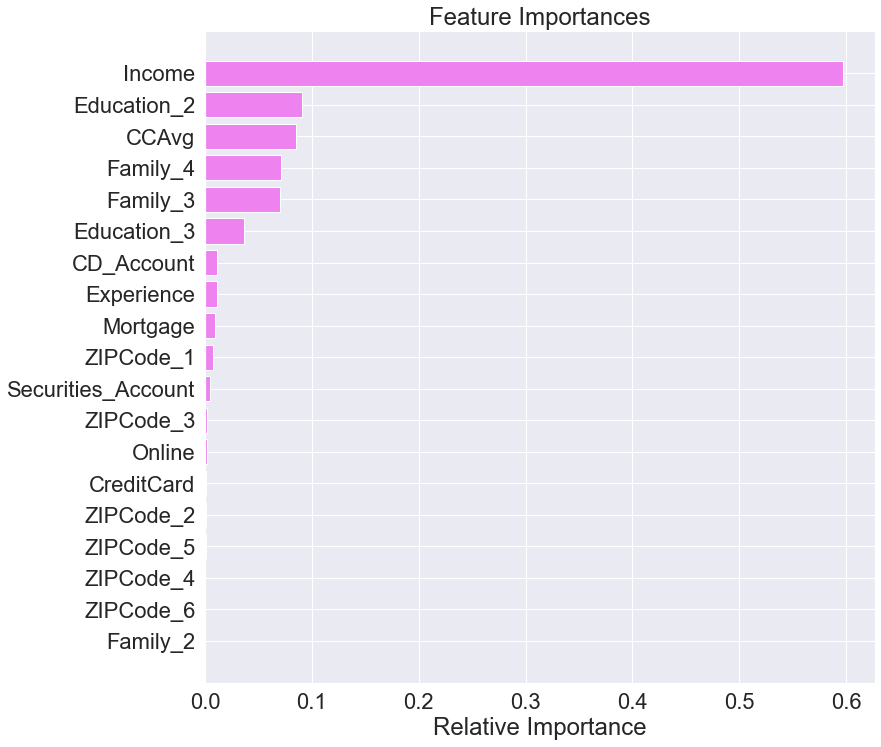

In [173]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* According to the decision tree model, Income is the most important variable for predicting the Personal Loan status.

***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Hyperparameter_Tuning_Using_Grid_Search'></a>

## (b) Hyperparameter Tuning Using Grid Search

In [183]:
from sklearn.model_selection import GridSearchCV

In [184]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=6,
                       max_features='log2', min_impurity_decrease=1e-06,
                       random_state=1)

## Score Pruned Tree

### Test Appropriate Metric (Accuracy/Recall)

In [188]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
get_recall_score(estimator)

Accuracy on training set :  0.9094285714285715
Accuracy on test set :  0.8813333333333333
Recall on training set :  0.9123867069486404
Recall on test set :  0.8053691275167785


### Updated Confusion Matrix

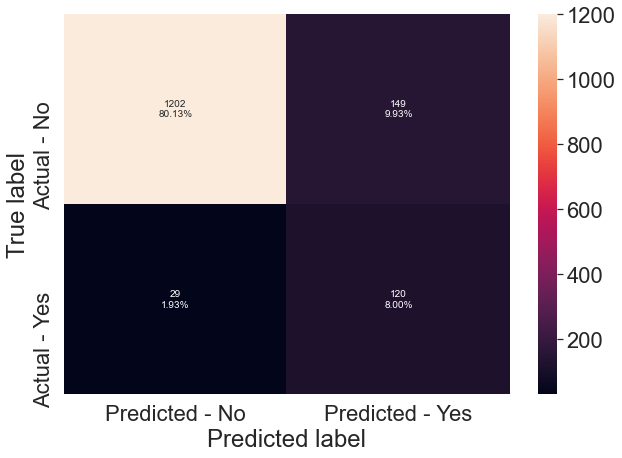

In [185]:
make_confusion_matrix(estimator,y_test)

### Visualize Decision Tree (image and text)

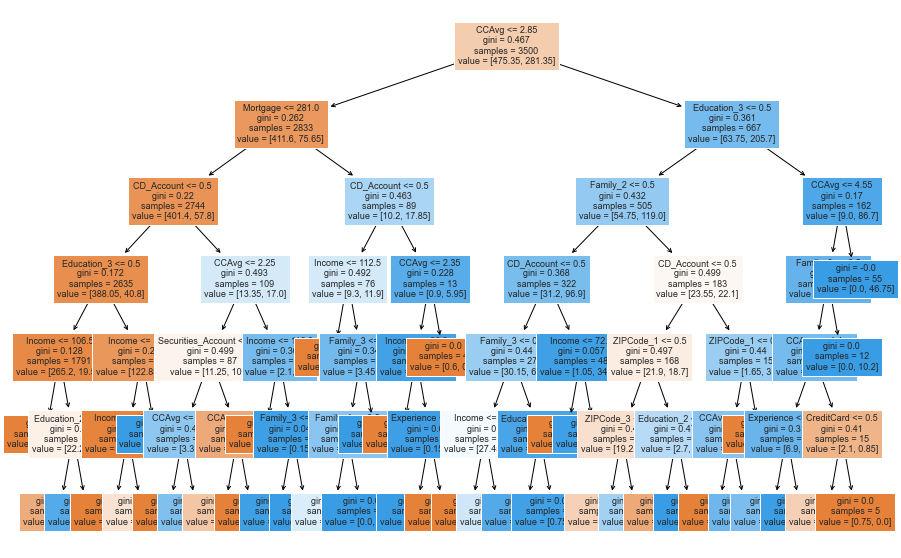

In [190]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [191]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- CCAvg <= 2.85
|   |--- Mortgage <= 281.00
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Education_3 <= 0.50
|   |   |   |   |--- Income <= 106.50
|   |   |   |   |   |--- weights: [243.00, 0.00] class: 0
|   |   |   |   |--- Income >  106.50
|   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |--- weights: [20.40, 6.80] class: 0
|   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |--- weights: [1.80, 12.75] class: 1
|   |   |   |--- Education_3 >  0.50
|   |   |   |   |--- Income <= 118.00
|   |   |   |   |   |--- Income <= 109.50
|   |   |   |   |   |   |--- weights: [119.55, 0.00] class: 0
|   |   |   |   |   |--- Income >  109.50
|   |   |   |   |   |   |--- weights: [3.30, 2.55] class: 0
|   |   |   |   |--- Income >  118.00
|   |   |   |   |   |--- weights: [0.00, 18.70] class: 1
|   |   |--- CD_Account >  0.50
|   |   |   |--- CCAvg <= 2.25
|   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |--- CCAvg <= 0.15
|   |   |   

### Display Gini Scores

In [192]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                    Imp
CCAvg              0.51
Income             0.23
CD_Account         0.07
Mortgage           0.05
Education_2        0.04
Family_3           0.03
Education_3        0.03
Family_2           0.02
Securities_Account 0.01
Family_4           0.00
Experience         0.00
ZIPCode_1          0.00
ZIPCode_3          0.00
CreditCard         0.00
ZIPCode_4          0.00
ZIPCode_5          0.00
ZIPCode_6          0.00
Online             0.00
ZIPCode_2          0.00


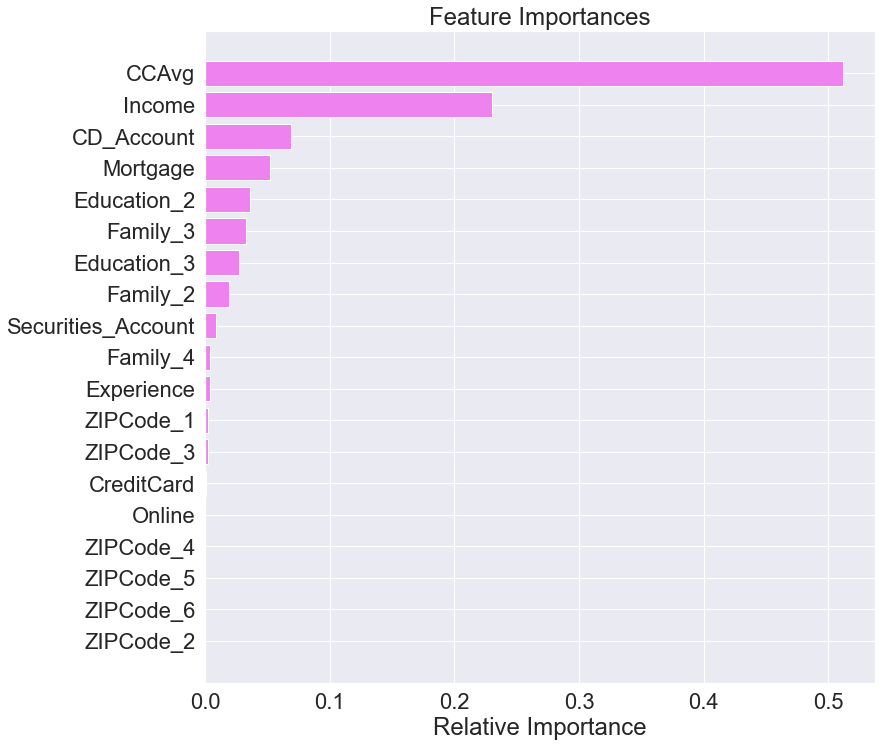

In [193]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Cost_Complexity_Pruning'></a>

## (c) Cost Complexity Pruning

In [194]:
clf = DecisionTreeClassifier(random_state=1,class_weight = {0:0.15,1:0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [195]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00,-0.00
1,0.00,-0.00
2,0.00,-0.00
3,0.00,-0.00
4,0.00,-0.00
...,...,...
61,0.01,0.06
62,0.01,0.07
63,0.02,0.09
64,0.03,0.21


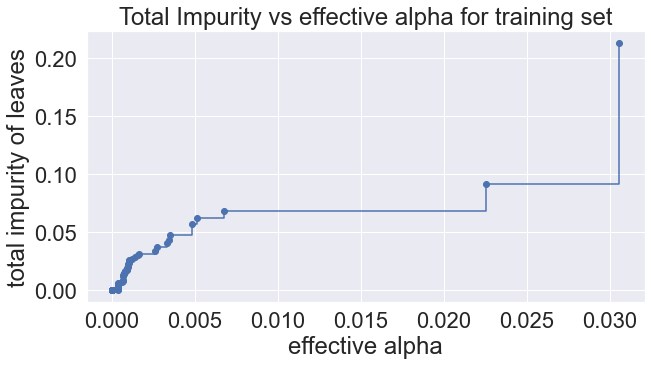

In [196]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [197]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2537957148948109


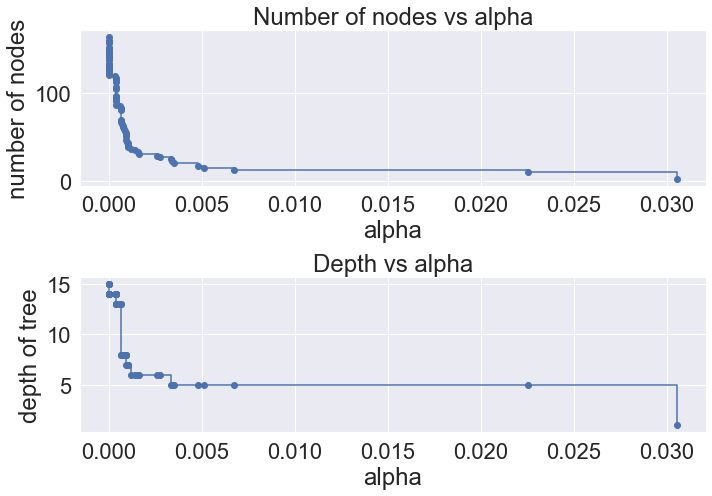

In [198]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## Score Pruned Tree

### Test Appropriate Metric (Accuracy/Recall)

In [200]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [201]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [202]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

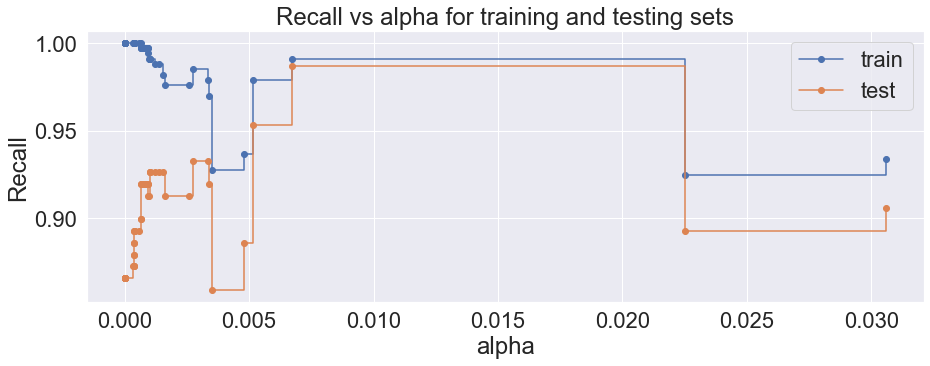

In [203]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [204]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.006725813690407279,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [205]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006725813690407279,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

### Updated Confusion Matrix

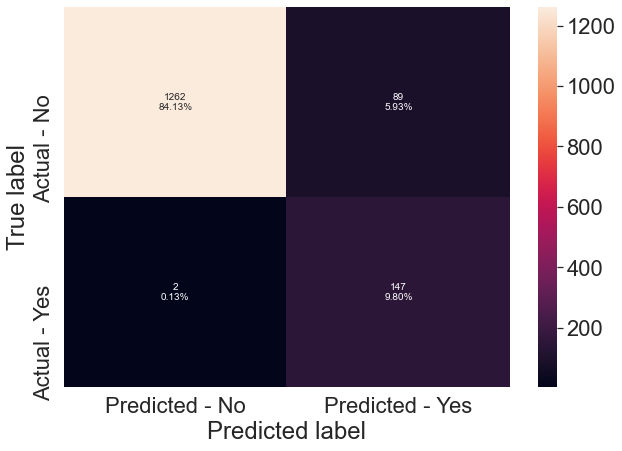

In [206]:
make_confusion_matrix(best_model,y_test)

In [207]:
get_recall_score(best_model)

Recall on training set :  0.9909365558912386
Recall on test set :  0.9865771812080537


### Visualize Decision Tree (image and text)

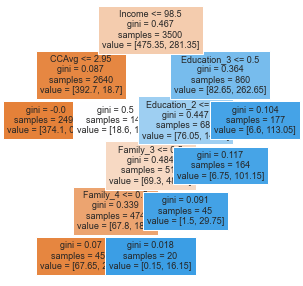

In [208]:
plt.figure(figsize=(5,5))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

## Compare Each Pruning Method

In [209]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 'Train_Recall':[1,0.83,0.89], 'Test_Recall':[0.30,0.81,0.86]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00,0.30
1,Decision treee with hyperparameter tuning,0.83,0.81
2,Decision tree with post-pruning,0.89,0.86


***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Insights_and_Marketing_Impact'></a>

# (5) Insights and Marketing Impact

* The Logistic Regression Models:
    * Indicates possession of a CD Account and a graduate level education or higher are the biggest positive predictors for a customer purchasing a loan.
    * Having 4 kids is the biggest negative predictor for a customer purchasing a loan.
* Decision Tree Models:
    * Indicate increased average credit card spending and income are the biggest indicators of a customer purchasing a loan.
* Marketing Targets:
    * Future campaigns should focus on reaching depositors with more credit card spending, higher incomes, and higher education.
    * Future campaigns should avoid spending advertising money were people with many children frequent.  This may be a waste of money. 


<a id='Misclassification_Analysis'></a>

# (6) Misclassification Analysis

In [211]:
Log_Error = (29+404)/(120+29+404+947)
Tree_Error = (149+29)/(1202+149+29+120)

print('Logistic Regression Classification Error Rates:',Log_Error)

print('Decision Tree Regression Classification Error Rates:',Tree_Error)
   

Logistic Regression Classification Error Rates: 0.2886666666666667
Decision Tree Regression Classification Error Rates: 0.11866666666666667


***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Business_Recommendations'></a>

# (7) Business Recommendations

* AllBank wishes to grow its business by increasing profits through expansion into the loan market.
* The customer marketing segments identified above may help maxizie the efficiency of future campaigns by targeting the best customers and spending less money to acquire more profitable customers.

* Some additional variables to consider include the likelyhood of a customer segment to default on a lone. This analysis did not tackle that subject, but it would not serve the bank well to provide more loans to people least likely to repay them. 



***
[[Table of Contents](#Table_of_Contents)]
***